# Obtaining the same UMAP with RNA velocity as Nakato-san and Nagai-san

In [1]:
suppressPackageStartupMessages({
    library(Seurat)
    library(SeuratWrappers)
    library(tidyverse)
    library(reticulate)
    library(MAST)
    library(velocyto.R)
    library(monocle3)
    library(ggplot2)
    library(patchwork)
    library(magrittr)
    library(tidyverse)
    library(DoubletFinder)
    library(Matrix)
})
options(warn=-1)
set.seed(1234)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”


In [2]:
#so <- readRDS("datasets/seurat/Seurat_aggr_QC1.rds")
load("datasets/seurat/Seurat_aggr_QC1.RData")

In [3]:
Idents(object = so) <- so$SCT_snn_res.0.5
so[["clusters"]] <- Idents(object = so)

Saving 6.67 x 6.67 in image



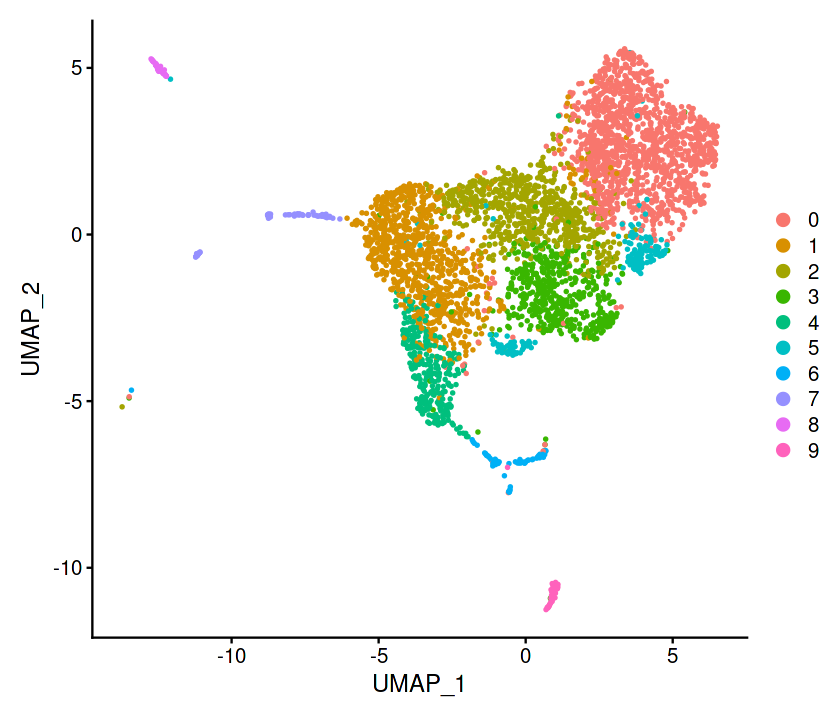

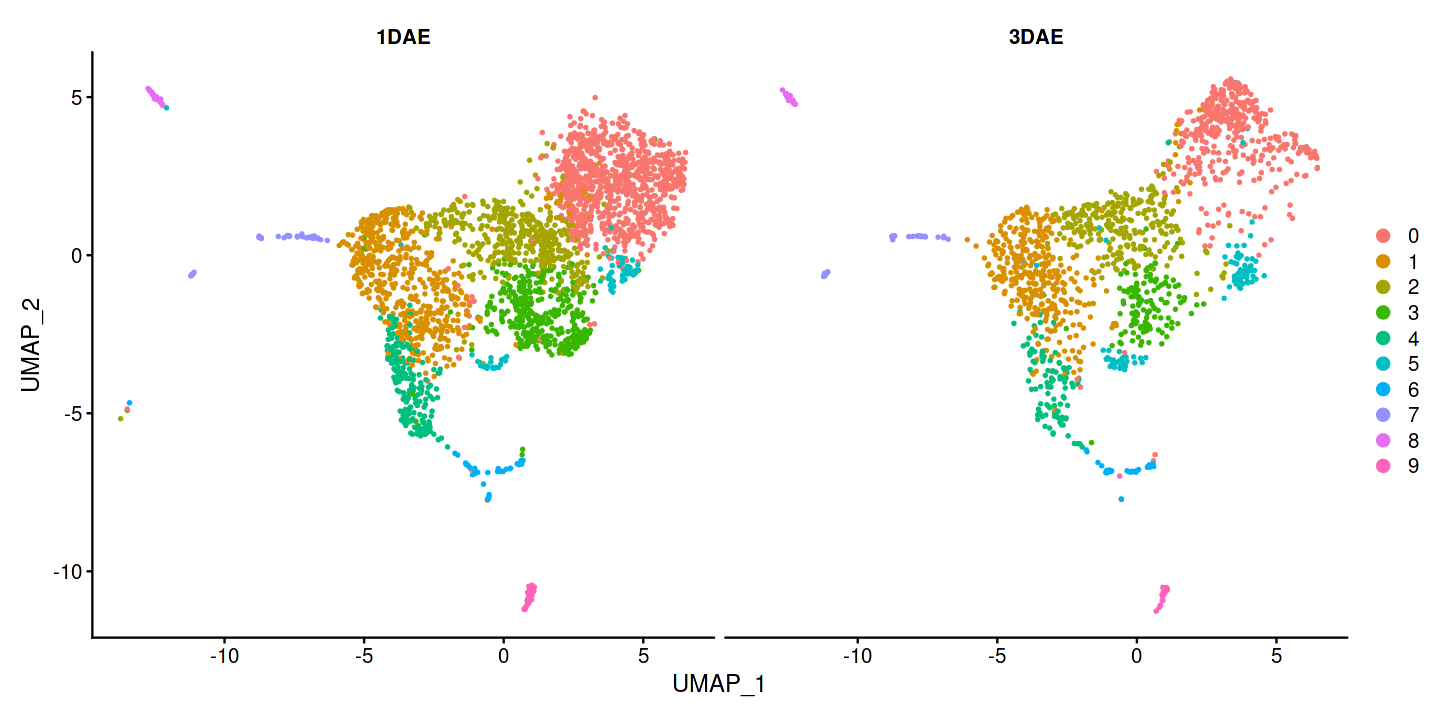

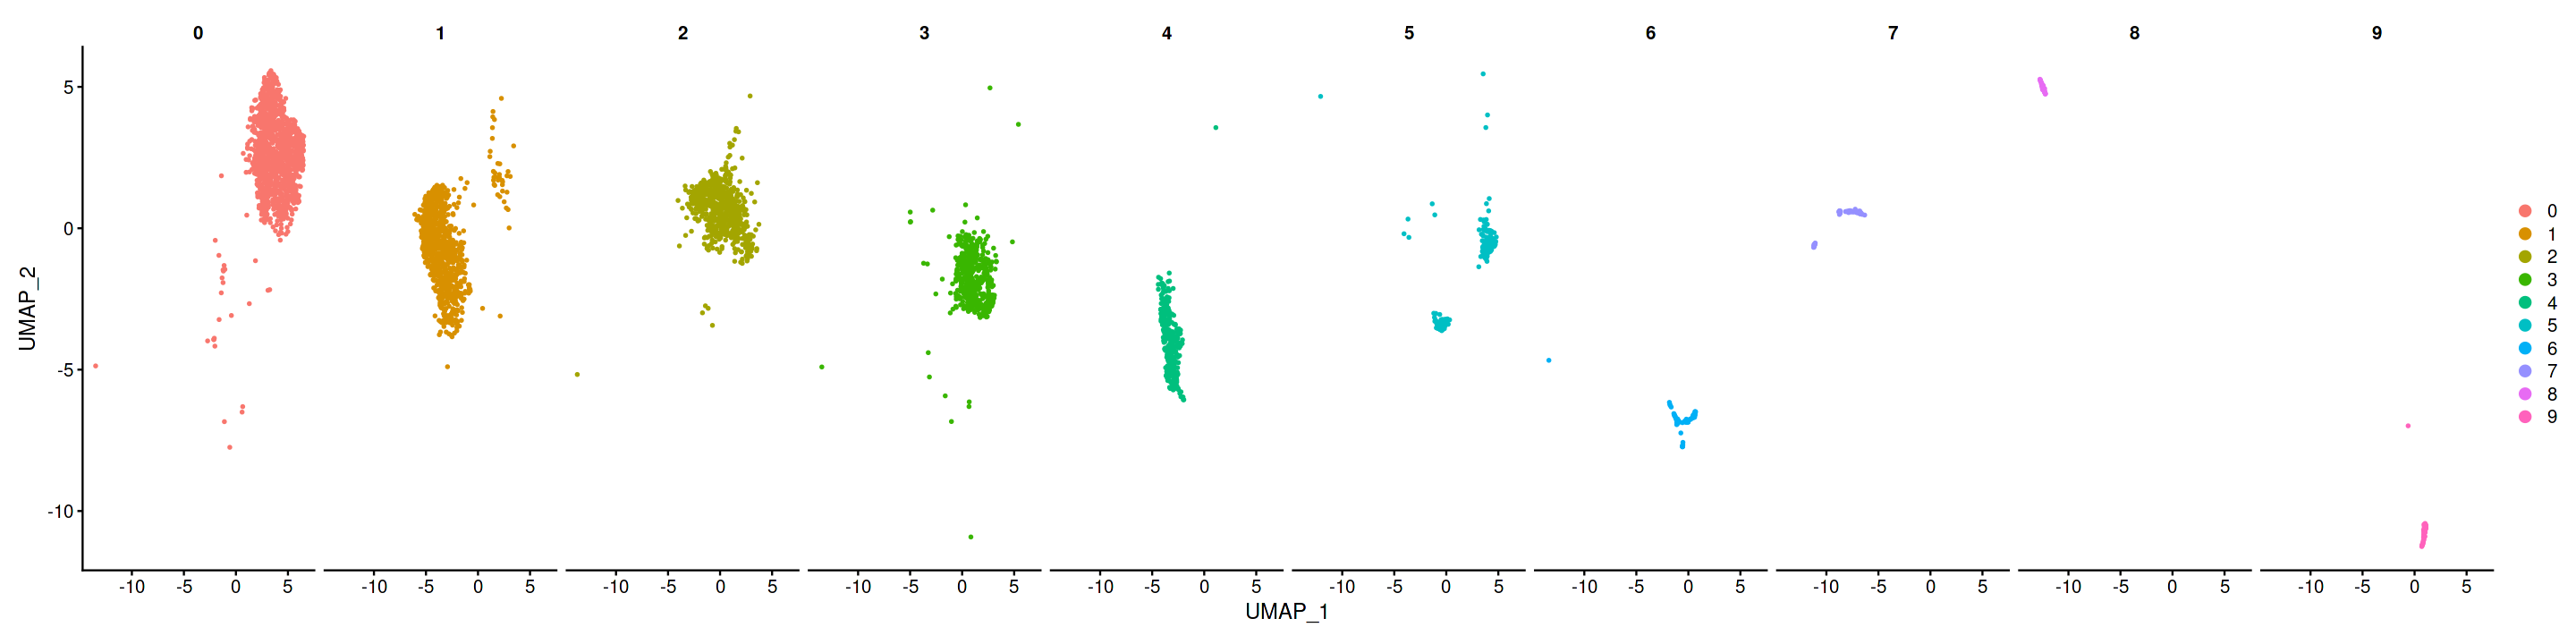

In [6]:
# UMAP all
options(repr.plot.width = 7, repr.plot.height = 6)
DimPlot(object = so, reduction = "umap", pt.size = .5)
ggsave("results/seurat_DEGs/UMAP_clusters_v1.pdf")

options(repr.plot.width = 12, repr.plot.height = 6)
DimPlot(object = so, reduction = "umap", split.by = "sample", pt.size = .5)

options(repr.plot.width = 24, repr.plot.height = 6)
DimPlot(object = so, reduction = "umap", split.by = "clusters", pt.size = .5)
ggsave("results/seurat_DEGs/UMAP_clusters_separated_v1.pdf", width = 24, height = 6)

In [8]:
#rename assay 'spliced' to 'RNA'
so <- RenameAssays(so, spliced="RNA")

groups <- SplitObject(so, split.by = "sample")
groups

$`1DAE`
An object of class Seurat 
51640 features across 2733 samples within 4 assays 
Active assay: SCT (9751 features, 3000 variable features)
 3 other assays present: unspliced, ambiguous, RNA
 2 dimensional reductions calculated: pca, umap

$`3DAE`
An object of class Seurat 
51640 features across 1485 samples within 4 assays 
Active assay: SCT (9751 features, 3000 variable features)
 3 other assays present: unspliced, ambiguous, RNA
 2 dimensional reductions calculated: pca, umap


In [9]:
# Doublet prediction
DAE1 <- groups$'1DAE'

DAE1 <- DAE1 %>% SCTransform() %>% RunPCA() %>% RunUMAP(dims = 1:10)

#so <- RenameAssays(so, spliced="RNA")
nExp <- round(ncol(DAE1) * 0.008)  # expect 4% doublets
DAE1 <- doubletFinder_v3(DAE1, pN = 0.25, pK = 0.09, nExp = nExp, PCs = 1:10, sct = TRUE)
DF.name = colnames(DAE1@meta.data)[grepl("DF.classification", colnames(DAE1@meta.data))]

Calculating cell attributes from input UMI matrix: log_umi

Variance stabilizing transformation of count matrix of size 9150 by 2733

Model formula is y ~ log_umi

Get Negative Binomial regression parameters per gene

Using 2000 genes, 2733 cells



  |======================================================================| 100%


There are 3 estimated thetas smaller than 1e-07 - will be set to 1e-07

Found 142 outliers - those will be ignored in fitting/regularization step


Second step: Get residuals using fitted parameters for 9150 genes



  |======================================================================| 100%


Computing corrected count matrix for 9150 genes



  |======================================================================| 100%


Calculating gene attributes

Wall clock passed: Time difference of 37.15779 secs

Determine variable features

Place corrected count matrix in counts slot

Centering data matrix

Set default assay to SCT

PC_ 1 
Positive:  CG13321, CG13704, CG15347, Tsp42Ee, Cyt-c-p, Tsp2A, CG43349, CG7142, Ssk, CG11267 
	   CG5011, Tsp29Fb, Nazo, Ldh, CG12926, CG44014, hoip, Fkbp39, CG5399, CG15422 
	   CG9568, Jafrac1, CG15423, CG11686, PCNA, CG32368, CG17109, awd, eEF1delta, alphaTub84B 
Negative:  CG17778, unc-104, bun, RpL27A, Thor, mt:CoIII, stl, Sirup, CG8839, ATP8B 
	   Prx2540-1, aqz, CG44085, RpS26, esg, CG15098, Lsd-2, CG32264, RpL32, RpS29 
	   E(spl)malpha-BFM, Prx2540-2, CG1648, scyl, CG13868, RpL27, Tet, RpL41, RpL37a, cib 
PC_ 2 
Positive:  Tsp29Fb, Ssk, Argk, CG44014, CG13321, Fst, CG13315, CG15347, CG1246, CG34288 
	   CG15152, CG15422, lectin-37Db, GstE3, CG15211, Cyp12a4, CG12780, Vha13, Pebp1, CG12974 
	   Tsp2A, CG7470, Agpat4, CG5011, CG10912, CG32687, hebe, mex1, Cyp9b2, CG8907 

[1] "Creating 911 artificial doublets..."


Loading required package: sctransform



[1] "Creating Seurat object..."
[1] "Running SCTransform..."


Calculating cell attributes from input UMI matrix: log_umi

Variance stabilizing transformation of count matrix of size 9545 by 3644

Model formula is y ~ log_umi

Get Negative Binomial regression parameters per gene

Using 2000 genes, 3644 cells



  |======================================================================| 100%


There are 2 estimated thetas smaller than 1e-07 - will be set to 1e-07

Found 236 outliers - those will be ignored in fitting/regularization step


Second step: Get residuals using fitted parameters for 9545 genes



  |======================================================================| 100%


Computing corrected count matrix for 9545 genes



  |======================================================================| 100%


Calculating gene attributes

Wall clock passed: Time difference of 46.48193 secs

Determine variable features

Place corrected count matrix in counts slot

Centering data matrix

Set default assay to SCT



[1] "Running PCA..."


PC_ 1 
Positive:  CG17778, RpL27A, bun, unc-104, RpL41, mt:CoIII, Thor, RpS26, aqz, RpL32 
	   stl, RpL27, Sirup, RpL28, esg, RpL37a, RpS29, cib, RpL12, ATP8B 
	   RpS7, E(spl)malpha-BFM, Tet, hdc, CG8839, Prx2540-1, CG1648, CG44085, CG32264, Myc 
Negative:  CG13321, CG15347, CG13704, Tsp2A, Ssk, Tsp29Fb, CG44014, CG43349, CG5011, CG15422 
	   CG5399, CG9568, CG1246, CG15423, CG17109, CG34288, CG12926, CG11686, Cyt-c-p, CG7142 
	   Ldh, CG43348, Nazo, Fst, CG3348, CG15211, CG11899, Agpat4, Acbp5, CG13315 
PC_ 2 
Positive:  Tsp42Ee, Pen, Fkbp39, HmgD, dUTPase, alphaTub84B, PCNA, awd, hoip, Df31 
	   smt3, CG1943, Cpr51A, CG11267, Ran, His2Av, Cyt-c-p, NHP2, babos, mod 
	   Act42A, CG7142, Prip, Ts, Ant2, CNBP, Nop56, eEF1delta, CG15083, Non2 
Negative:  Argk, CG13315, CG7470, lectin-37Db, CG15152, Fst, CG17778, CG10912, unc-104, CG12780 
	   hebe, Cyp9f2, Cyp12a4, Pebp1, hiro, CG12974, CG32687, CG34288, CG13323, Cyp9b2 
	   GstE3, Jon65Aiii, Thor, CAH1, CG31087, Phae2, Tsp29Fb, CG12825,

[1] "Calculating PC distance matrix..."
[1] "Computing pANN..."
[1] "Classifying doublets.."


In [7]:
p1 <- DimPlot(DAE1, group.by = DF.name, pt.size = .8) + 
        ggtitle("Doublets in 1DAE") +
        theme(plot.title = element_text(hjust = 0.5))

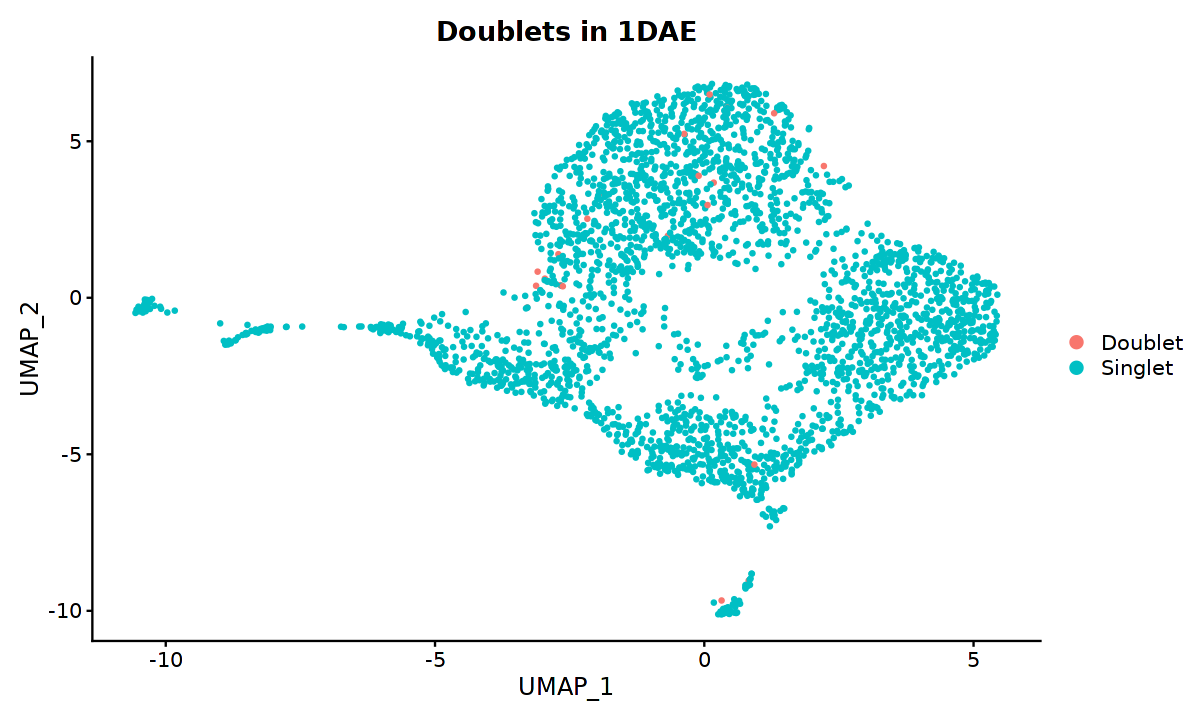

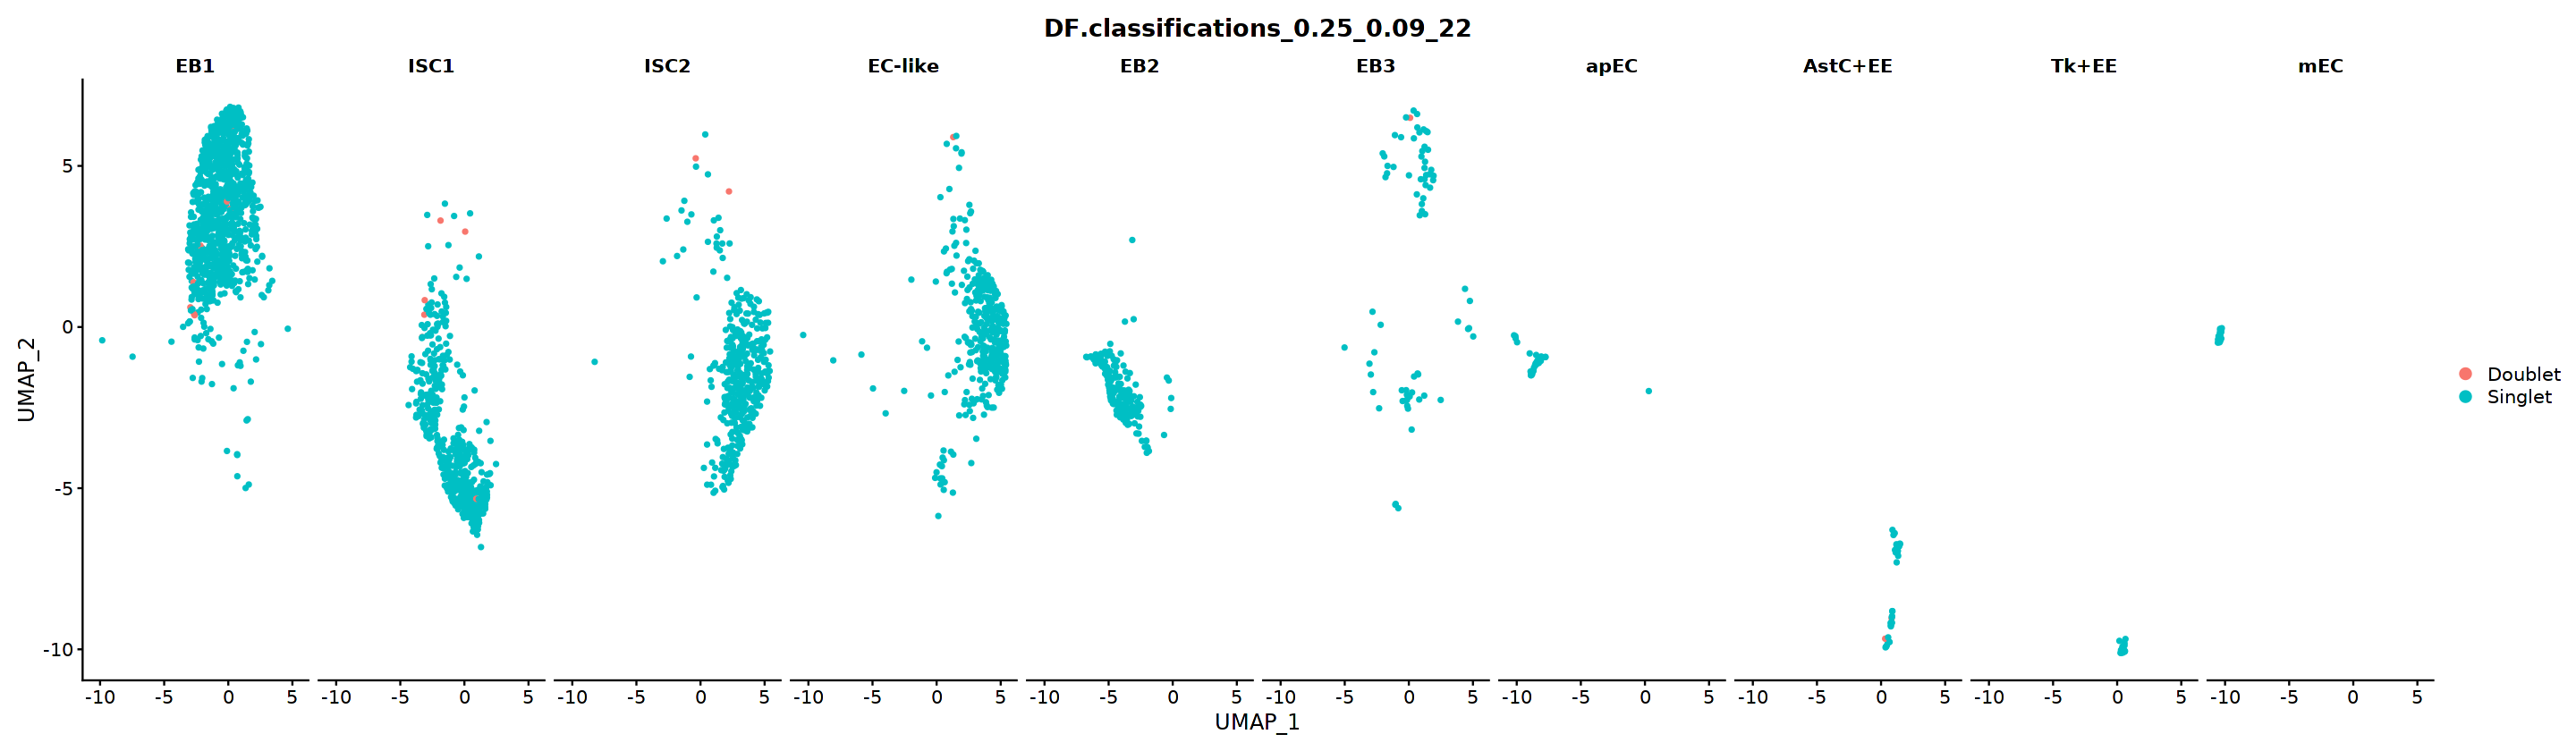

In [8]:
p2 <- DimPlot(DAE1, group.by = DF.name, split.by = "ident", pt.size = 1) 

options(repr.plot.width = 10, repr.plot.height = 6)
p1
ggsave("results/seurat_QC_plots/QC_doublet_check_1DAE.pdf", width = 10, height = 6)

options(repr.plot.width = 24, repr.plot.height = 7)
p2
ggsave("results/seurat_QC_plots/QC_doublet_check_1DAE_cluster.pdf", width = 24, height = 7)

In [9]:
# Remove the doublets
table(DAE1@meta.data$DF.classifications_0.25_0.09_22)


Doublet Singlet 
     22    2711 

In [10]:
DAE1 <- subset(x = DAE1, subset = DF.classifications_0.25_0.09_22 == 'Doublet', invert = TRUE)
DAE1

An object of class Seurat 
51039 features across 2711 samples within 4 assays 
Active assay: SCT (9150 features, 3000 variable features)
 3 other assays present: unspliced, ambiguous, RNA
 2 dimensional reductions calculated: pca, umap

In [11]:
# Doublet prediction
DAE3 <- groups$'3DAE'

DAE3 <- DAE3 %>% SCTransform() %>% RunPCA() %>% RunUMAP(dims = 1:10)

#so <- RenameAssays(so, spliced="RNA")
nExp <- round(ncol(DAE3) * 0.008)  # expect 4% doublets
DAE3 <- doubletFinder_v3(DAE3, pN = 0.25, pK = 0.09, nExp = nExp, PCs = 1:10, sct = TRUE)
DF.name = colnames(DAE3@meta.data)[grepl("DF.classification", colnames(DAE3@meta.data))]

Calculating cell attributes from input UMI matrix: log_umi

Variance stabilizing transformation of count matrix of size 8982 by 1485

Model formula is y ~ log_umi

Get Negative Binomial regression parameters per gene

Using 2000 genes, 1485 cells



  |======================================================================| 100%


There are 2 estimated thetas smaller than 1e-07 - will be set to 1e-07

Found 115 outliers - those will be ignored in fitting/regularization step


Second step: Get residuals using fitted parameters for 8982 genes



  |======================================================================| 100%


Computing corrected count matrix for 8982 genes



  |======================================================================| 100%


Calculating gene attributes

Wall clock passed: Time difference of 31.93918 secs

Determine variable features

Place corrected count matrix in counts slot

Centering data matrix

Set default assay to SCT

PC_ 1 
Positive:  CG13321, CG13704, Tsp29Fb, CG15347, Tsp2A, CG15422, CG5011, CG43349, Ssk, CG15423 
	   CG44014, Cyt-c-p, CG43348, Nazo, CG12926, CG34288, Ldh, CG1246, CG11686, CG9568 
	   CG5399, CG17109, CG32368, CG12974, RNASEK, Tsp42Eq, Pebp1, CG5819, Lfg, CG15211 
Negative:  RpL27A, bun, unc-104, Prx2540-1, RpL41, Sirup, Myc, CG17778, mt:CoIII, CG44085 
	   CG12896, Lsd-2, esg, ATP8B, aqz, CG11825, Prx2540-2, RpS29, RpS26, E(spl)malpha-BFM 
	   Tet, CG32264, RpS7, RpL28, RpL37a, CG1648, E(spl)mbeta-HLH, CG13868, peb, CG15098 
PC_ 2 
Positive:  Pen, HmgD, Tsp42Ee, Df31, dUTPase, Fkbp39, alphaTub84B, CG1943, smt3, hoip 
	   awd, babos, Cpr51A, Act42A, HmgZ, His2Av, Ran, CG11267, D1, PCNA 
	   CNBP, CG15083, CG14434, Non2, NHP2, RPA3, wun2, Set, Jupiter, HP4 
Negative:  Prx2540-1, 

[1] "Creating 495 artificial doublets..."
[1] "Creating Seurat object..."
[1] "Running SCTransform..."


Calculating cell attributes from input UMI matrix: log_umi

Variance stabilizing transformation of count matrix of size 9342 by 1980

Model formula is y ~ log_umi

Get Negative Binomial regression parameters per gene

Using 2000 genes, 1980 cells



  |======================================================================| 100%


There are 1 estimated thetas smaller than 1e-07 - will be set to 1e-07

Found 166 outliers - those will be ignored in fitting/regularization step


Second step: Get residuals using fitted parameters for 9342 genes



  |======================================================================| 100%


Computing corrected count matrix for 9342 genes



  |======================================================================| 100%


Calculating gene attributes

Wall clock passed: Time difference of 40.17334 secs

Determine variable features

Place corrected count matrix in counts slot

Centering data matrix

Set default assay to SCT



[1] "Running PCA..."


PC_ 1 
Positive:  CG13321, Tsp29Fb, CG15347, CG5011, CG15422, Tsp2A, Ssk, CG43349, CG44014, CG13704 
	   CG15423, CG34288, CG1246, CG43348, CG12974, Fst, Pebp1, lectin-37Db, Argk, CG15211 
	   CG32633, GstE3, CG13315, CG12780, CG9568, CG15152, CG8907, Oatp33Eb, Agpat4, CG10912 
Negative:  RpL41, RpL27A, bun, Prx2540-1, Myc, unc-104, Sirup, RpL28, mt:CoIII, aqz 
	   RpS26, E(spl)malpha-BFM, esg, Tet, RpS7, E(spl)mbeta-HLH, CG17778, RpL37a, RpS29, hdc 
	   peb, cib, CG1648, RpLP1, CG44085, ATP8B, RpL27, Lsd-2, Cirl, CG32264 
PC_ 2 
Positive:  Prx2540-1, unc-104, CG17778, CG12896, Prx2540-2, CG11825, Thor, hebe, CG44085, GstT4 
	   CG34198, CG6770, Sirup, CG30090, stl, Lsd-2, CG5254, CG7470, CG32264, ATP8B 
	   mt:CoIII, CG8839, bun, Argk, Cyp6a9, pirk, CG15098, DOR, Cyp9f2, CG15784 
Negative:  Tsp42Ee, Pen, HmgD, Fkbp39, alphaTub84B, dUTPase, hoip, CG1943, CG11267, Act42A 
	   Cyt-c-p, Df31, HmgZ, smt3, Ran, awd, CG7142, babos, PCNA, CG15083 
	   NHP2, His2Av, D1, CG14434, Prip, Cpr51A, 

[1] "Calculating PC distance matrix..."
[1] "Computing pANN..."
[1] "Classifying doublets.."


In [12]:
p1 <- DimPlot(DAE3, group.by = DF.name, pt.size = .8) + 
        ggtitle("Doublet in 3DAE") +
        theme(plot.title = element_text(hjust = 0.5))

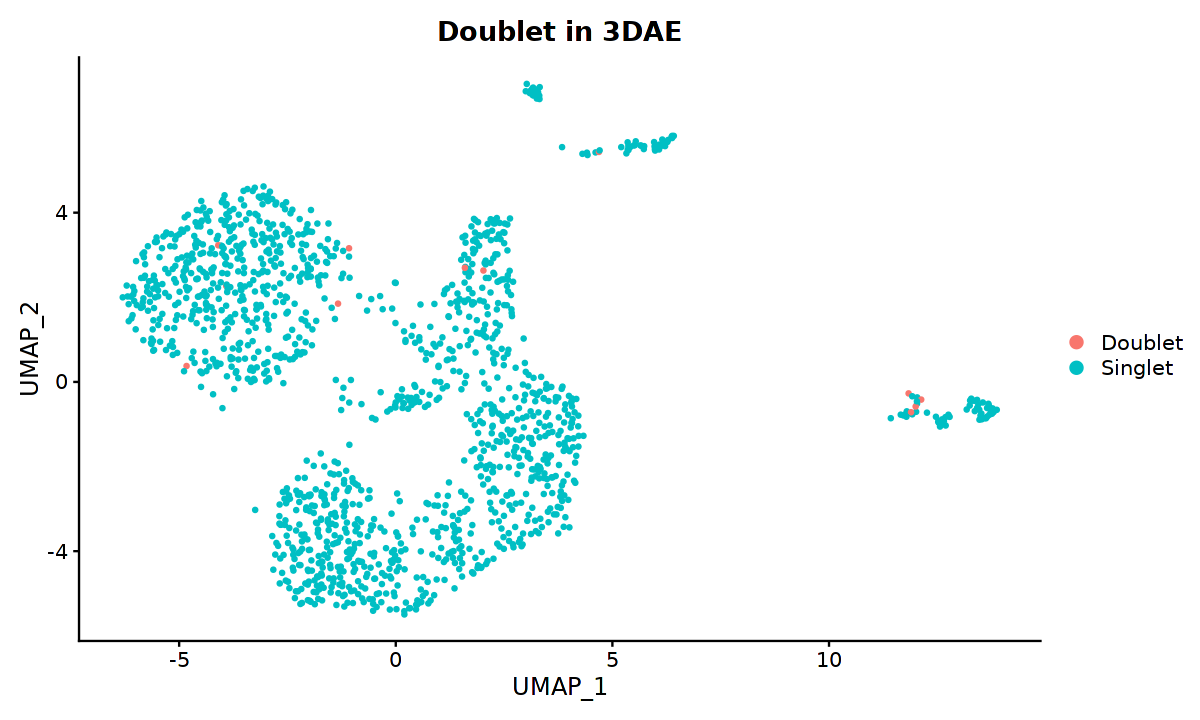

In [13]:
p2 <- DimPlot(DAE3, group.by = DF.name, split.by = "ident", pt.size = 1)

options(repr.plot.width = 10, repr.plot.height = 6)
p1
ggsave("results/seurat_QC_plots/QC_doublet_check_3DAE.pdf", width = 10, height = 6)


options(repr.plot.width = 24, repr.plot.height = 7)
p2
ggsave("results/seurat_QC_plots/QC_doublet_check_3DAE_clusters.pdf", width = 24, height = 7)

In [14]:
table(DAE3@meta.data$DF.classifications_0.25_0.09_12) 


Doublet Singlet 
     12    1473 

In [15]:
DAE3

An object of class Seurat 
50871 features across 1485 samples within 4 assays 
Active assay: SCT (8982 features, 3000 variable features)
 3 other assays present: unspliced, ambiguous, RNA
 2 dimensional reductions calculated: pca, umap

In [16]:
# Remove the doublets

DAE3 <- subset(x = DAE3, subset = DF.classifications_0.25_0.09_12 == 'Doublet', invert = TRUE)

In [17]:
DAE3

An object of class Seurat 
50871 features across 1473 samples within 4 assays 
Active assay: SCT (8982 features, 3000 variable features)
 3 other assays present: unspliced, ambiguous, RNA
 2 dimensional reductions calculated: pca, umap

In [18]:
# Merge the samples back
#if(!missing(so)){
rm(so)
#}

so <- merge(DAE1, y = DAE3, add.cell.ids = c("1DAE", "3DAE"), project = "Nakajima_Drosophila")

#rename back assay 'RNA' to 'spliced' 
so <- RenameAssays(so, RNA="spliced")

In [19]:
# 34 cells were removed based on DoubletFinder

In [20]:
so[["percent.mt"]] <- PercentageFeatureSet(so, pattern = "^mt:")
Idents(object = so) <- so$sample

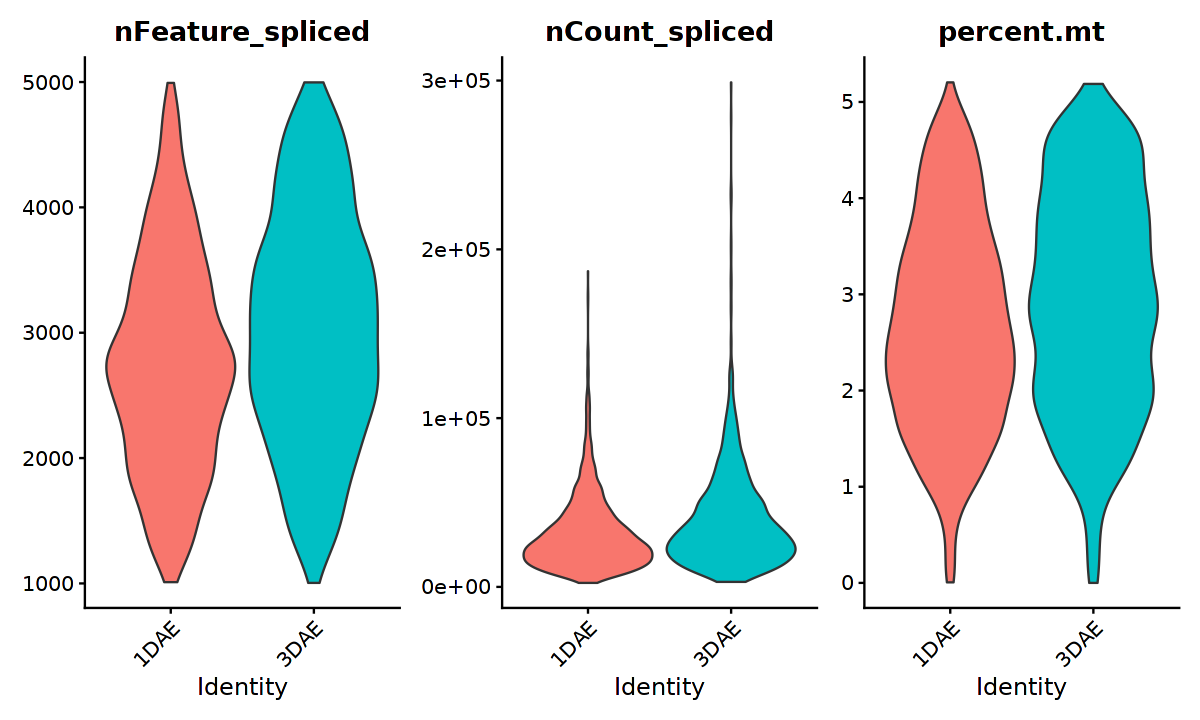

In [21]:
options(repr.plot.width = 10, repr.plot.height = 6)
VlnPlot(so, features = c("nFeature_spliced", "nCount_spliced", "percent.mt"), ncol = 3, pt.size = 0)
ggsave("results/seurat_QC_plots/QC_metrics_v2.pdf", width = 10, height = 6)

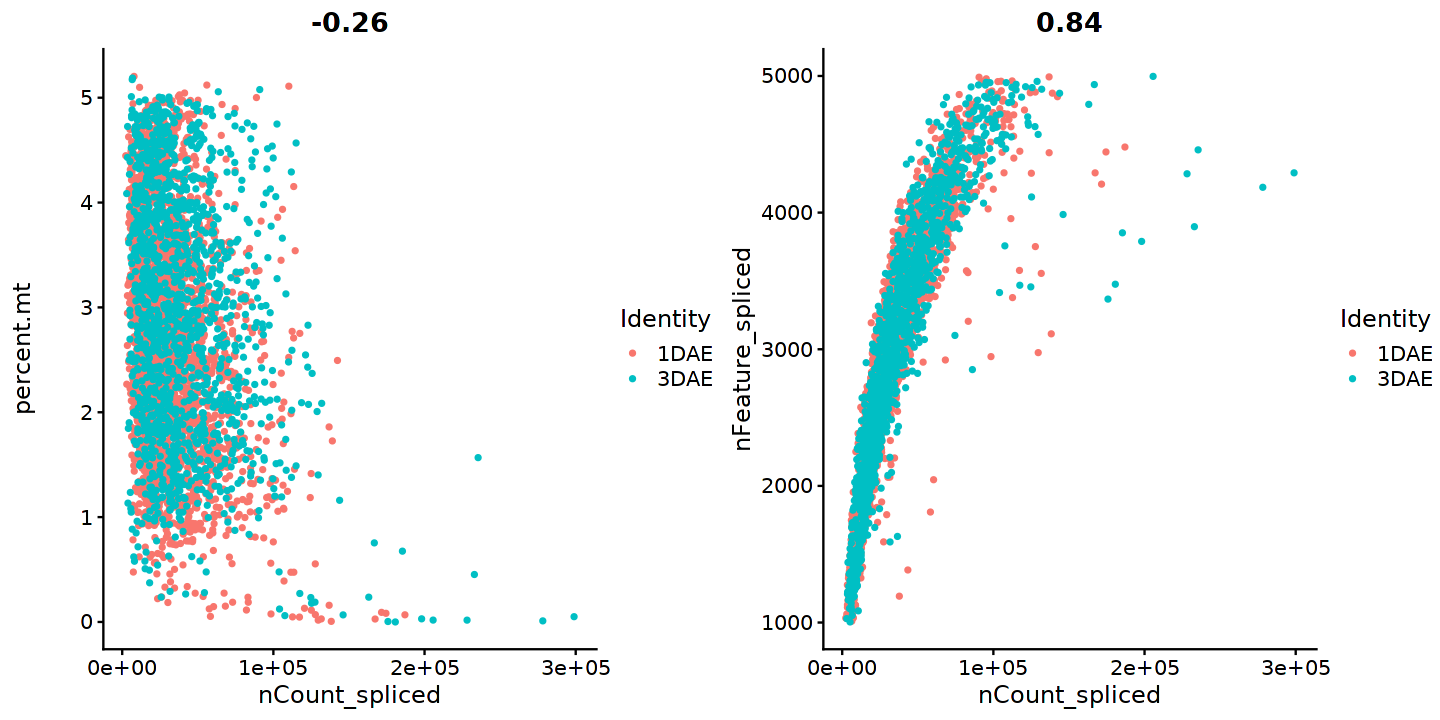

In [22]:
options(repr.plot.width = 12, repr.plot.height = 6)
plot1 <- FeatureScatter(so, feature1 = "nCount_spliced", feature2 = "percent.mt")
plot2 <- FeatureScatter(so, feature1 = "nCount_spliced", feature2 = "nFeature_spliced")
CombinePlots(plots = list(plot1, plot2))
ggsave("results/seurat_QC_plots/QC_featureScatter_v2.pdf", width = 12, height = 6)

In [23]:
# It is not necessary to run this process again, because it was previously done
#so <- subset(so, subset = nFeature_spliced > 1000 & nFeature_spliced < 5000 & percent.mt < 5)

In [24]:
so <- SCTransform(so, assay = "spliced", vars.to.regress = c("percent.mt", "nCount_spliced"), verbose = FALSE, )
so <- RunPCA(so)

PC_ 1 
Positive:  RpL41, RpL27A, RpLP1, RpS7, RpL28, bun, sta, RpS26, eEF1alpha1, RpL27 
	   Df31, RpL37a, RpS29, Pen, Cyp1, Cpr51A, cib, Myc, Prx2540-1, HmgD 
	   unc-104, Dtg, aqz, CG17778, Tsp42Ee, hdc, Tet, RpS19a, CG6357, Npc2a 
Negative:  Tsp29Fb, CG13321, Ssk, CG44014, CG15347, CG15422, Tsp2A, CG13315, lectin-37Db, CG34288 
	   Fst, CG13704, CG5011, Pebp1, GstE3, CG1246, Argk, CG12974, CG15152, CG43349 
	   CG12780, CG12825, CG10912, CG15211, CG32633, Cyp12a4, CG13086, Jon65Aiii, CG32687, hiro 
PC_ 2 
Positive:  CG17778, unc-104, Thor, Prx2540-1, bun, Prx2540-2, Sirup, RpL27A, stl, CG12896 
	   CG5254, CG44085, CG34198, CG11825, ATP8B, CG8839, hebe, CG7470, CG32264, CG17145 
	   CG15098, Lsd-2, Cyp6a9, GstT4, CG30090, DOR, CG6770, RpS29, CG13868, pirk 
Negative:  Tsp42Ee, Cyt-c-p, Pen, CG7142, Fkbp39, hoip, alphaTub84B, PCNA, dUTPase, CG11267 
	   HmgD, CG1943, h, CG13704, awd, CG12926, CG45060, CG32368, Ldh, smt3 
	   Prip, Nazo, Ran, NHP2, eEF1delta, Jafrac1, Ant2, Act42A, mod

In [25]:
# 以後の解析に用いる主成分の数
ndim <- 20

so <- FindNeighbors(so, dims = 1:ndim) %>%
      FindClusters(resolution = c(0.3, 0.5), force.recalc= TRUE)
head(Idents(so), 5)

Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 4184
Number of edges: 139834

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8735
Number of communities: 8
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 4184
Number of edges: 139834

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8274
Number of communities: 10
Elapsed time: 0 seconds


1DAE_1DAE:AACCATGGTAAGCAATx 1DAE_1DAE:AACCCAAAGCTATCTGx 
                          0                           2 
1DAE_1DAE:AAAGGATTCTTGTGCCx 1DAE_1DAE:AACAAAGAGAATAGTCx 
                          2                           1 
1DAE_1DAE:AACAAGACAGCTTCGGx 
                          6 
Levels: 0 1 2 3 4 5 6 7 8 9

In [26]:
so <- RunUMAP(so, dims = 1:ndim, verbose = FALSE) %>%
      RunVelocity(deltaT = 1, kCells = 25, fit.quantile = 0.02, verbose = FALSE)

Found more than one class "dist" in cache; using the first, from namespace 'BiocGenerics'

Also defined by ‘spam’

Found more than one class "dist" in cache; using the first, from namespace 'BiocGenerics'

Also defined by ‘spam’



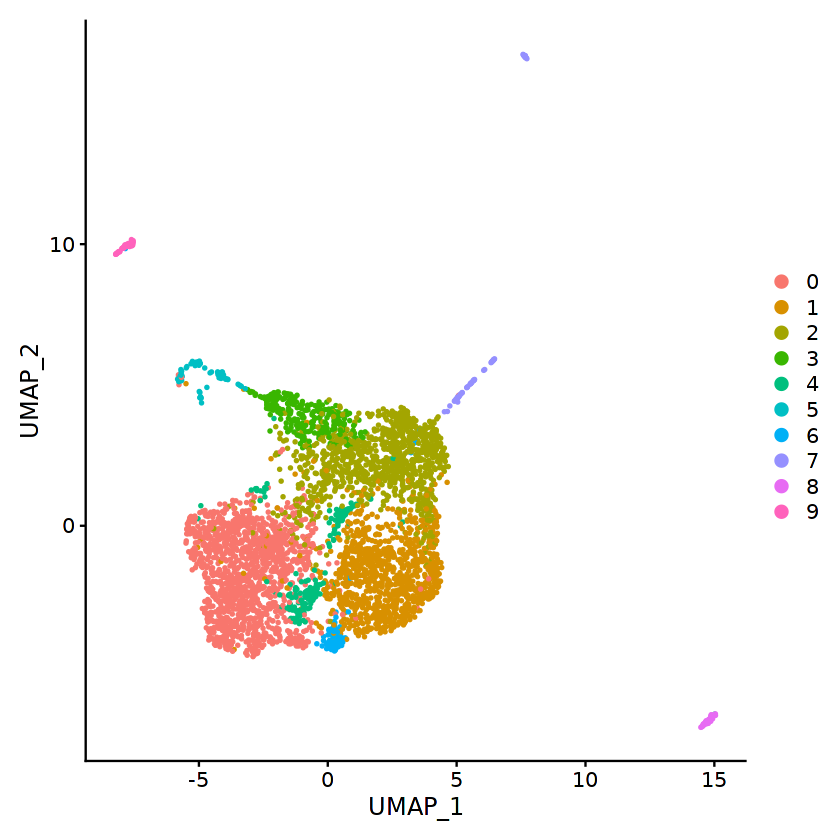

In [27]:
options(repr.plot.width = 7, repr.plot.height = 7)
DimPlot(so, reduction = "umap", pt.size = 0.5)
ggsave("results/seurat_QC_plots/UMAP_DimPlot_v2.pdf", width = 7, height = 7)

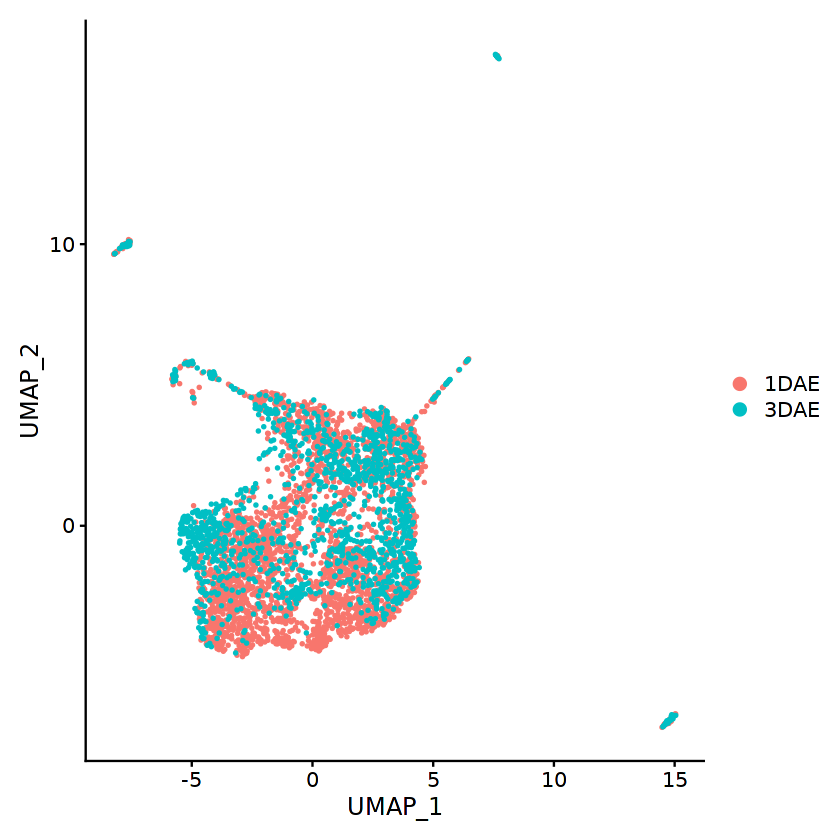

In [28]:
Idents(object = so) <- so$sample
DimPlot(object = so , reduction = "umap", pt.size = .5)

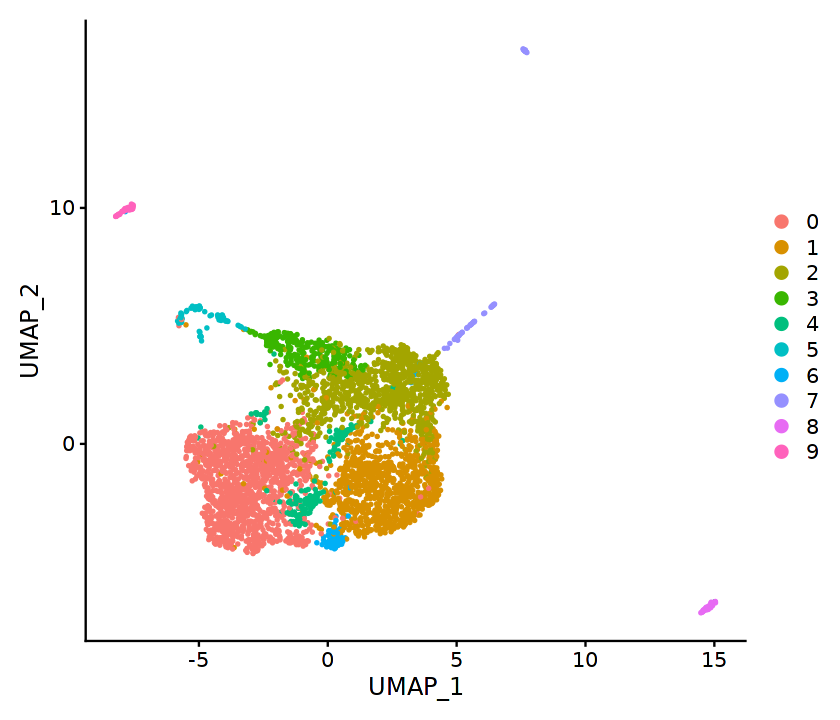

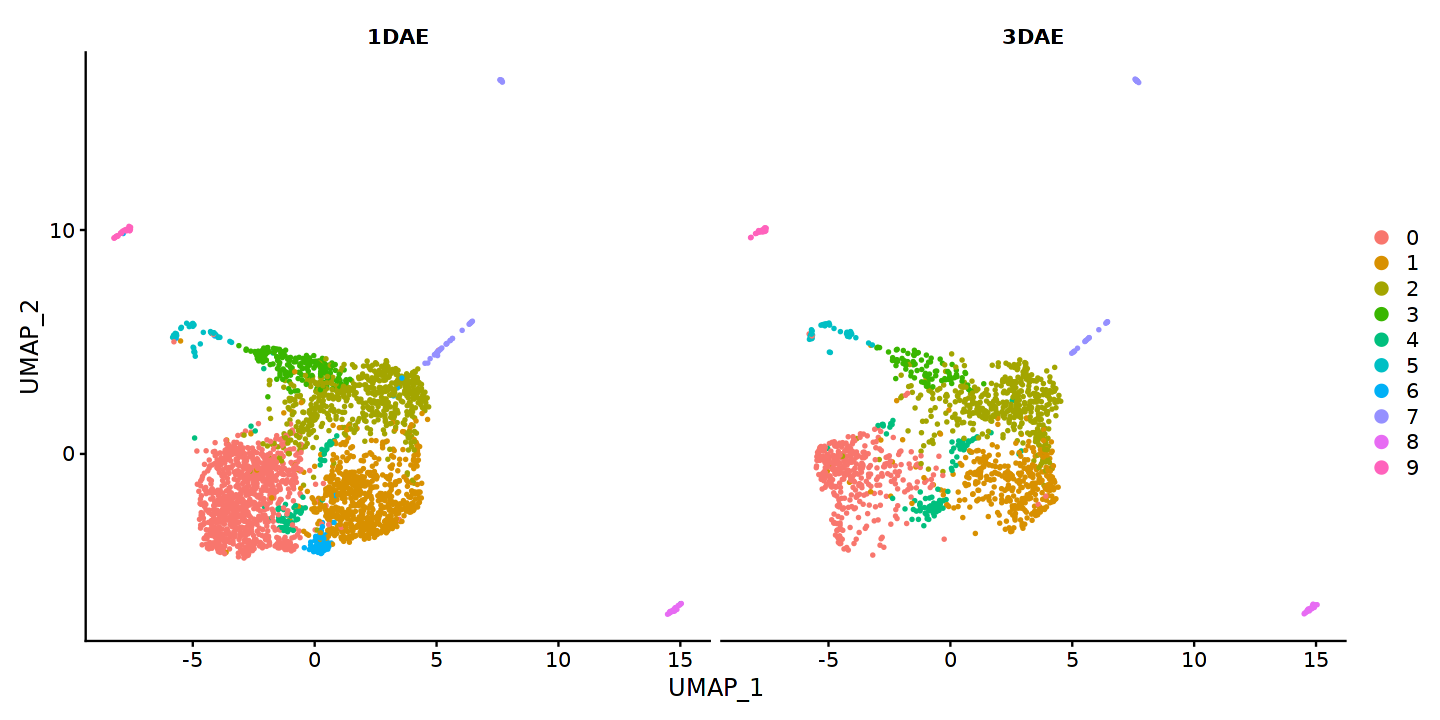

In [29]:
Idents(object = so) <- so$`SCT_snn_res.0.5`
    
options(repr.plot.width = 7, repr.plot.height = 6)
DimPlot(object = so, reduction = "umap", pt.size = .5)

options(repr.plot.width = 12, repr.plot.height = 6)
DimPlot(object = so, reduction = "umap", split.by = "sample", pt.size = .5)
ggsave("results/seurat_QC_plots/UMAP_DimPlot_samples_v2.pdf", width = 12, height = 7)

In [30]:
so.markers <- FindAllMarkers(so, only.pos = TRUE, min.pct = 0.1, logfc.threshold = 0.7)
top3 <- so.markers %>% group_by(cluster) %>% top_n(n = 3, wt = avg_log2FC)

Calculating cluster 0

Calculating cluster 1

Calculating cluster 2

Calculating cluster 3

Calculating cluster 4

Calculating cluster 5

Calculating cluster 6

Calculating cluster 7

Calculating cluster 8

Calculating cluster 9



In [31]:
top3$gene

[1] "unc-104"          "Prx2540-1"        "CG17145"          "ed"              
 [5] "E(spl)malpha-BFM" "Dl"               "Pen"              "CG1943"          
 [9] "Cpr51A"           "Ssk"              "CG7142"           "CG13321"         
[13] "Hsp68"            "Hsp26"            "AttD"             "betaTry"         
[17] "CG12374"          "epsilonTry"       "Ag5r2"            "CG11911"         
[21] "Jon99Fi"          "CG14989"          "AstC"             "CCHa2"           
[25] "Tk"               "CG12934"          "NPF"              "CG6277"          
[29] "CG5767"           "CG8661"

In [32]:
options(repr.plot.width = 13, repr.plot.height = 11)
DoHeatmap(so, features = top3$gene) + NoLegend()
ggsave("results/seurat_QC_plots/heatmap_v2.pdf", width = 13, height = 11)

In [33]:
markergenes <- c("Dl", "esg", "Su(H)", "pros", "alphaTry", "betaTry", "lambdaTry", "iotaTry", "Vha100-4", "lab", "Hml", "zfh1")

options(repr.plot.width = 16, repr.plot.height = 10)
FeaturePlot(object = so,
            features = markergenes,
            cols = c("lightgrey", "blue"), 
            reduction= "umap")

ggsave("results/seurat_QC_plots/UMAP_marker_genes_v2.pdf", width = 16, height = 10)

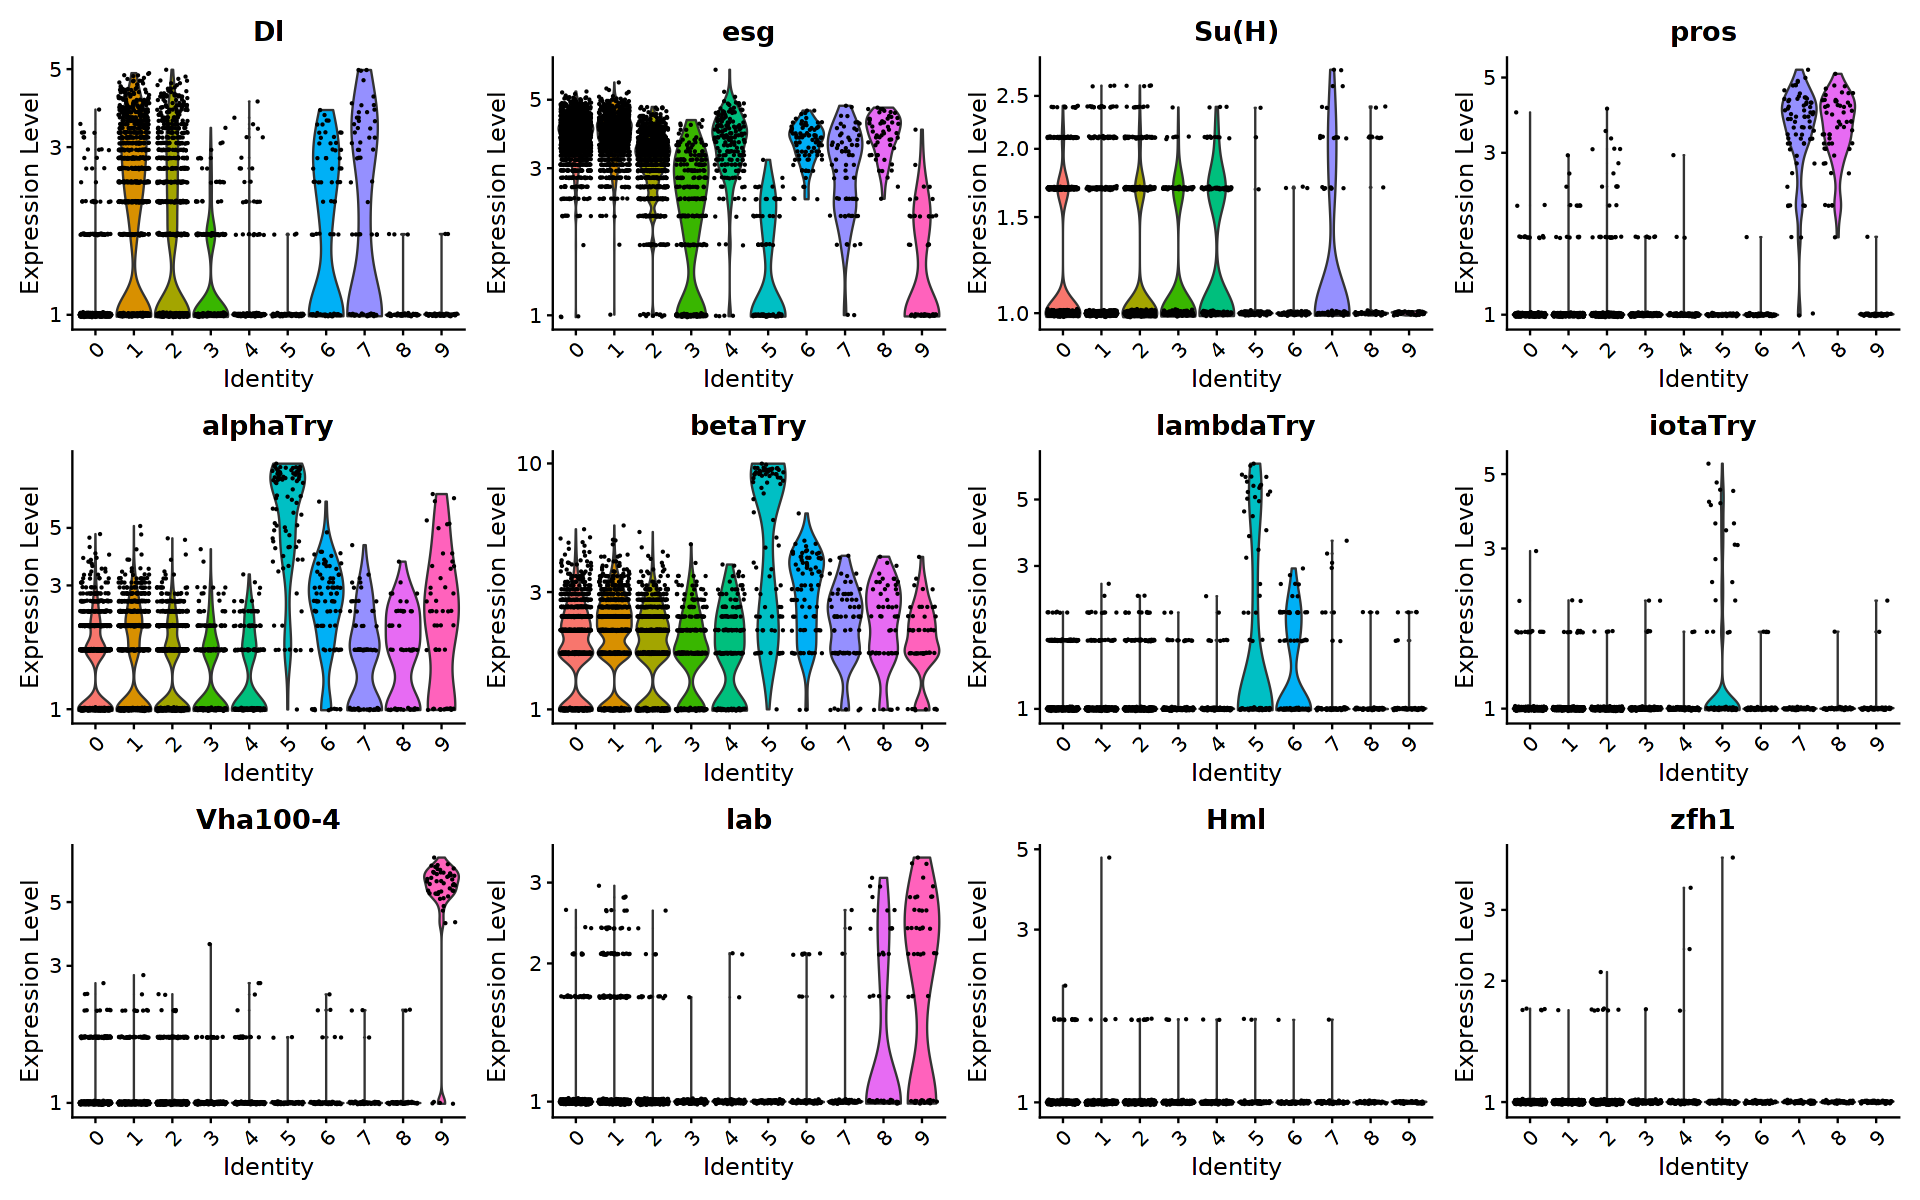

In [34]:
VlnPlot(object = so, features= markergenes, slot = "data", log = TRUE)
ggsave("results/seurat_QC_plots/violin_marker_genes_v2.pdf", width = 16, height = 10)

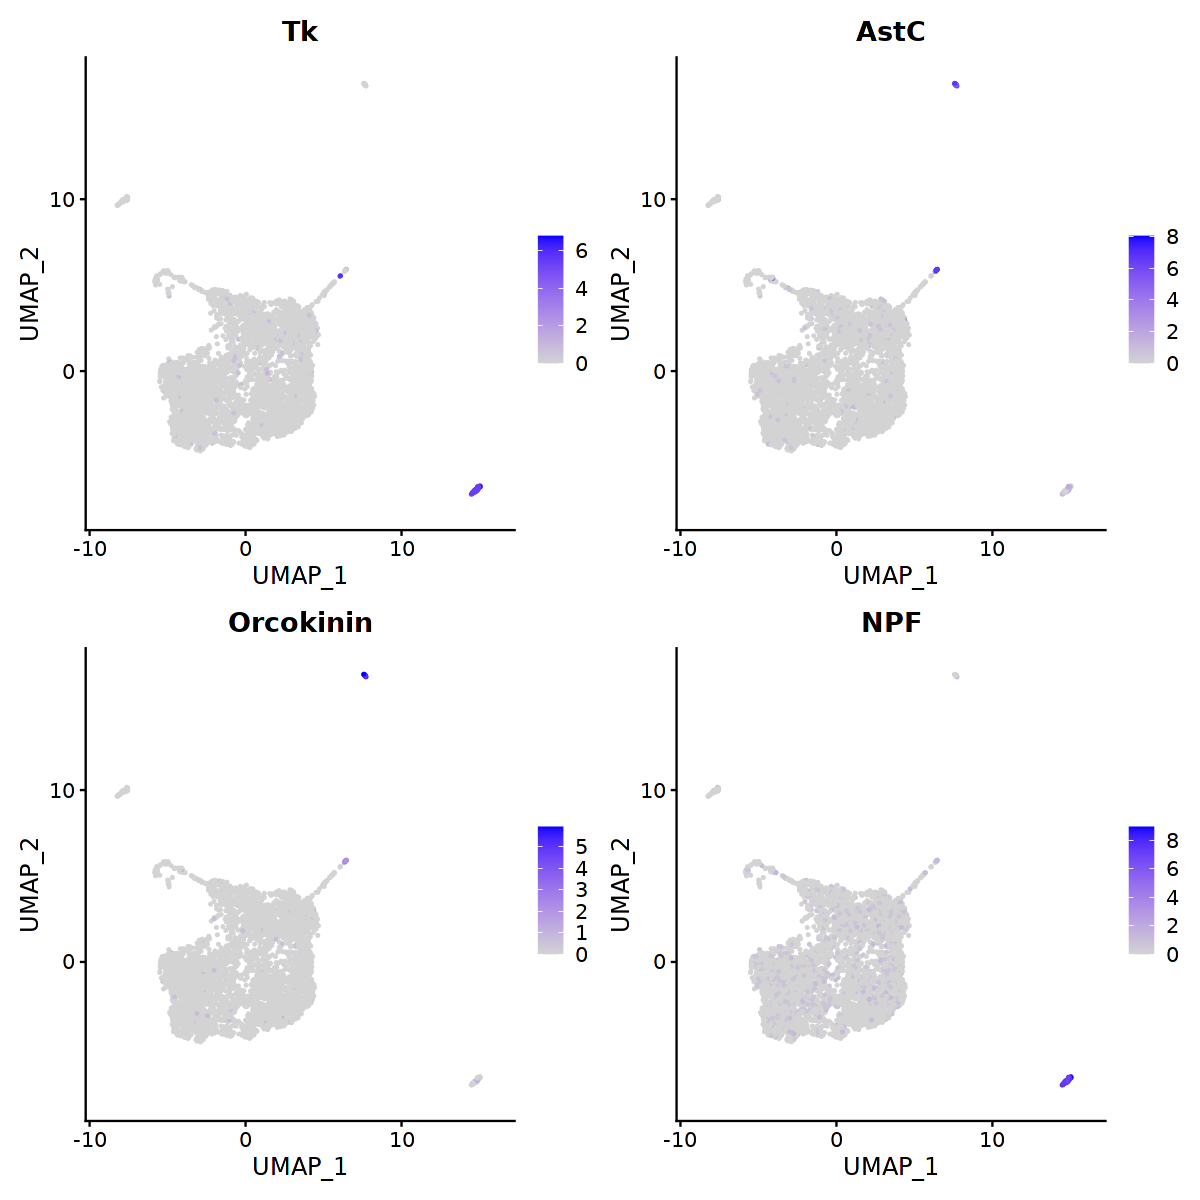

In [35]:
markergenes_EE <- c("Tk", "AstC", "Orcokinin", "NPF")
options(repr.plot.width = 10, repr.plot.height = 10)
FeaturePlot(object = so,
            features = markergenes_EE,
            cols = c("lightgrey", "blue"), 
            reduction= "umap")
ggsave("results/seurat_QC_plots/UMAP_marker_genes_EEcells_v2.pdf", width = 10, height = 10)

In [36]:
options(repr.plot.width = 10, repr.plot.height = 7)
VlnPlot(object = so, features= markergenes_EE, slot = "data", log = TRUE)
ggsave("results/seurat_QC_plots/violin_marker_genes_EEcells_v2.pdf", width = 10, height = 7)

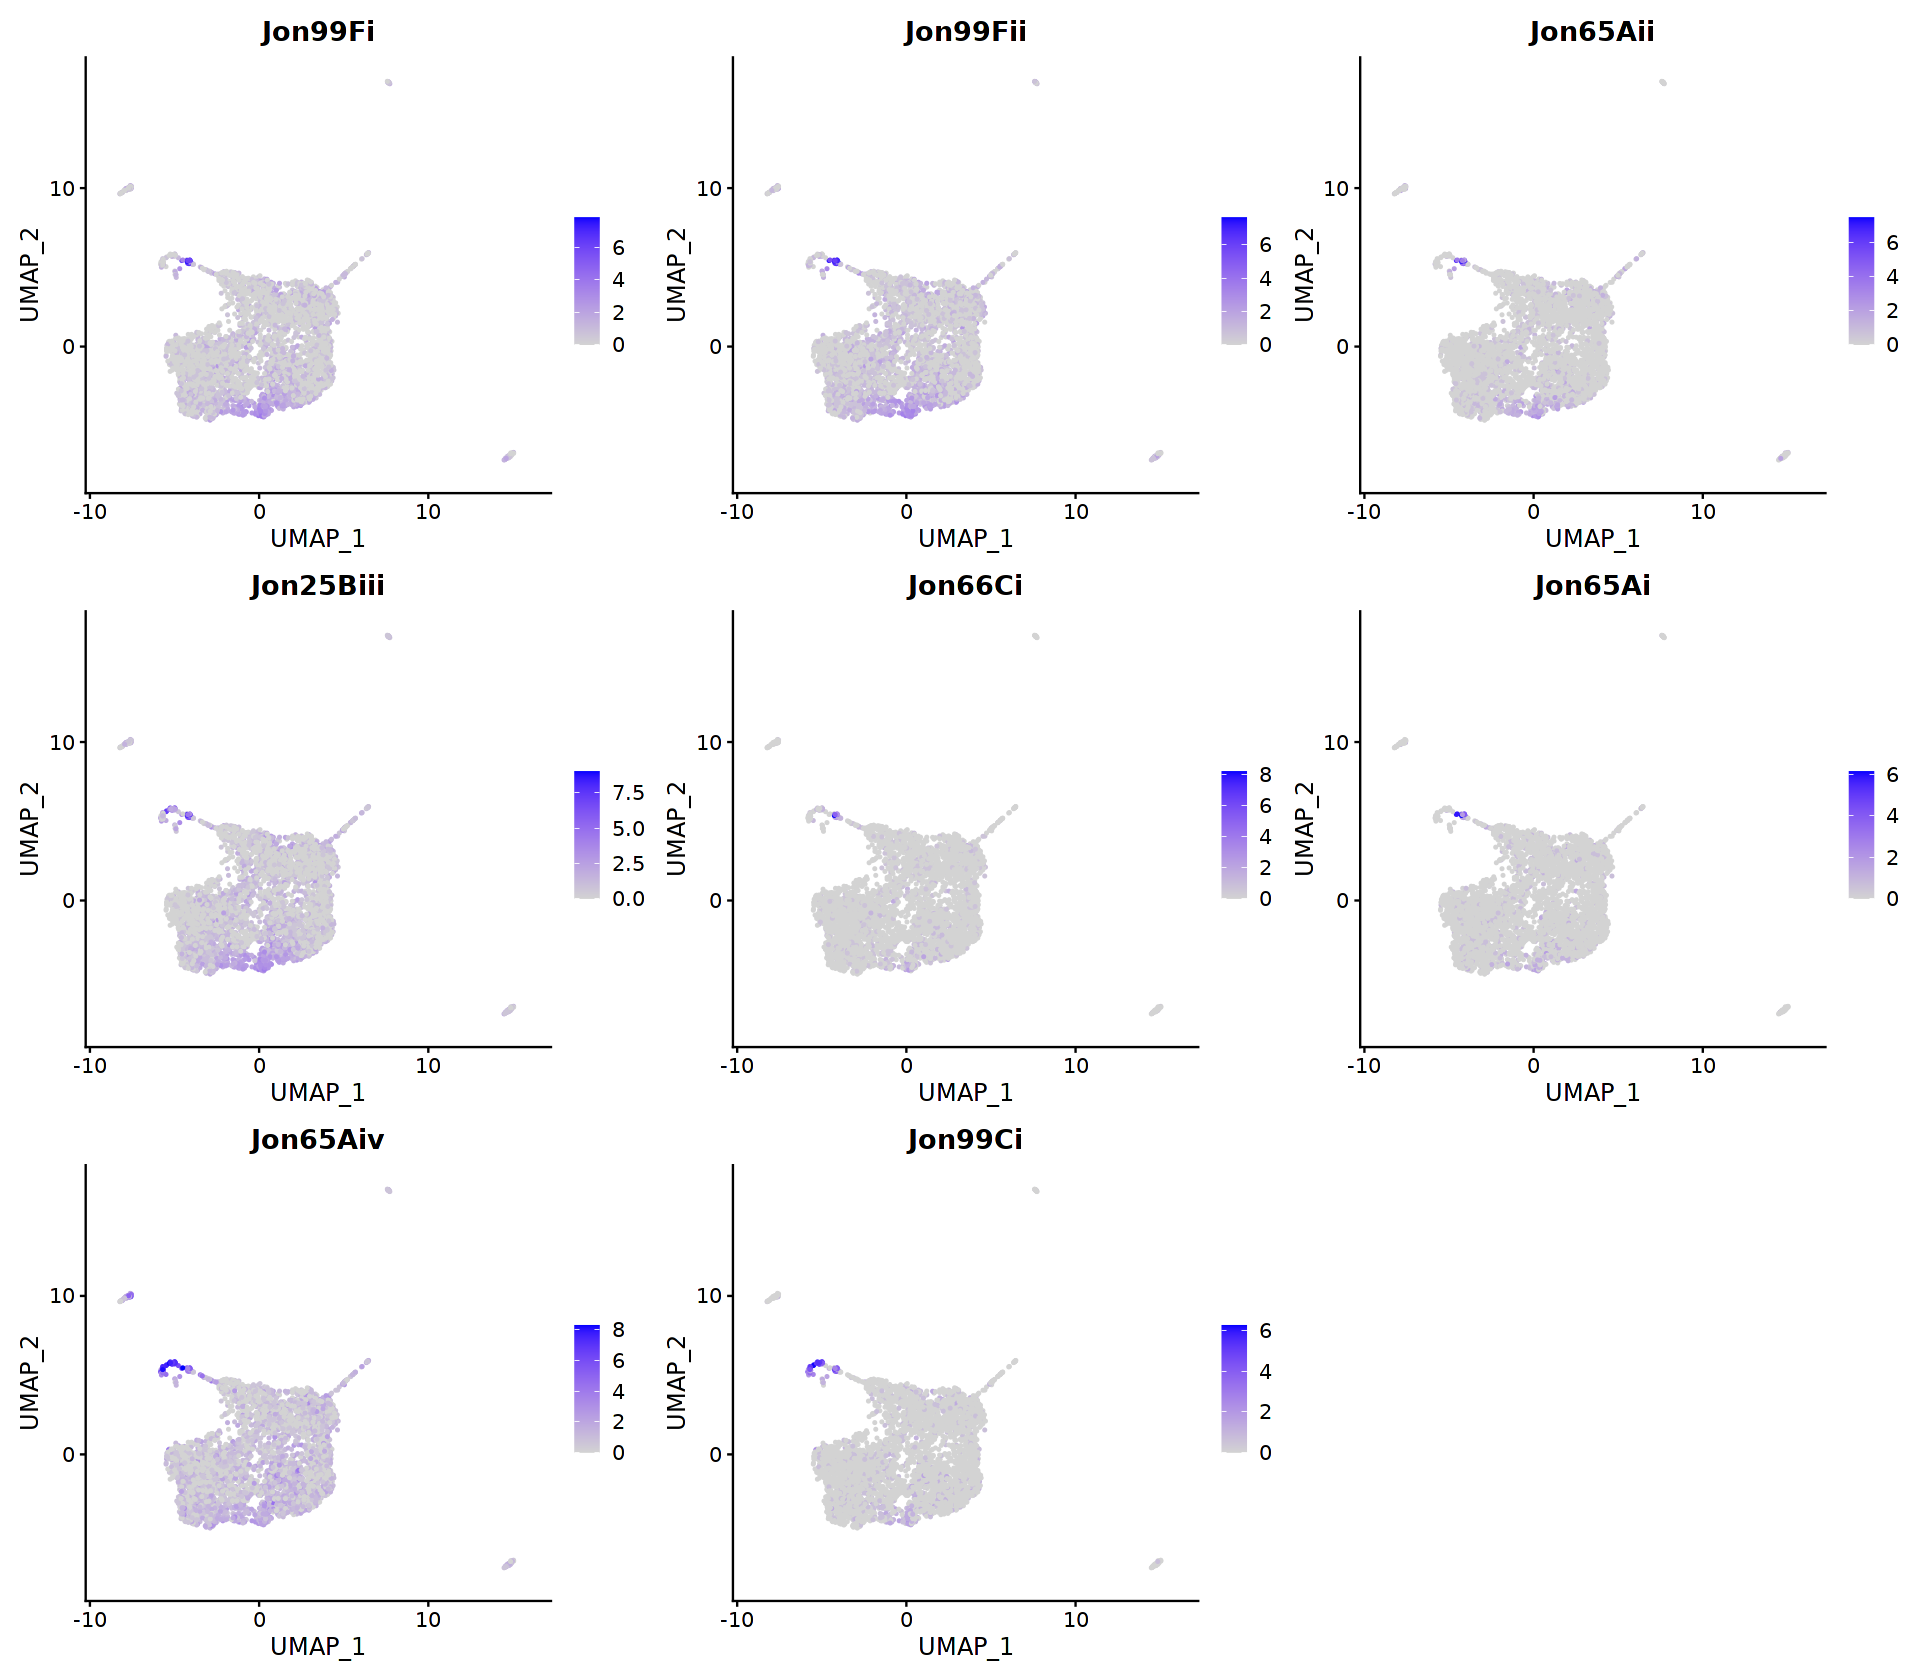

In [37]:
markergenes_endopeptidase <- c("Jon99Fi", "Jon99Fii", "Jon65Aii", "Jon25Biii", "Jon66Ci", "Jon65Ai", "Jon65Aiv", "Jon99Ci")
options(repr.plot.width = 16, repr.plot.height = 14)
FeaturePlot(so, features = markergenes_endopeptidase,
    cols = c("lightgrey", "blue"),
    reduction= "umap")

ggsave("results/seurat_QC_plots/UMAP_marker_genes_apEC_v2.pdf", width = 16, height = 14)

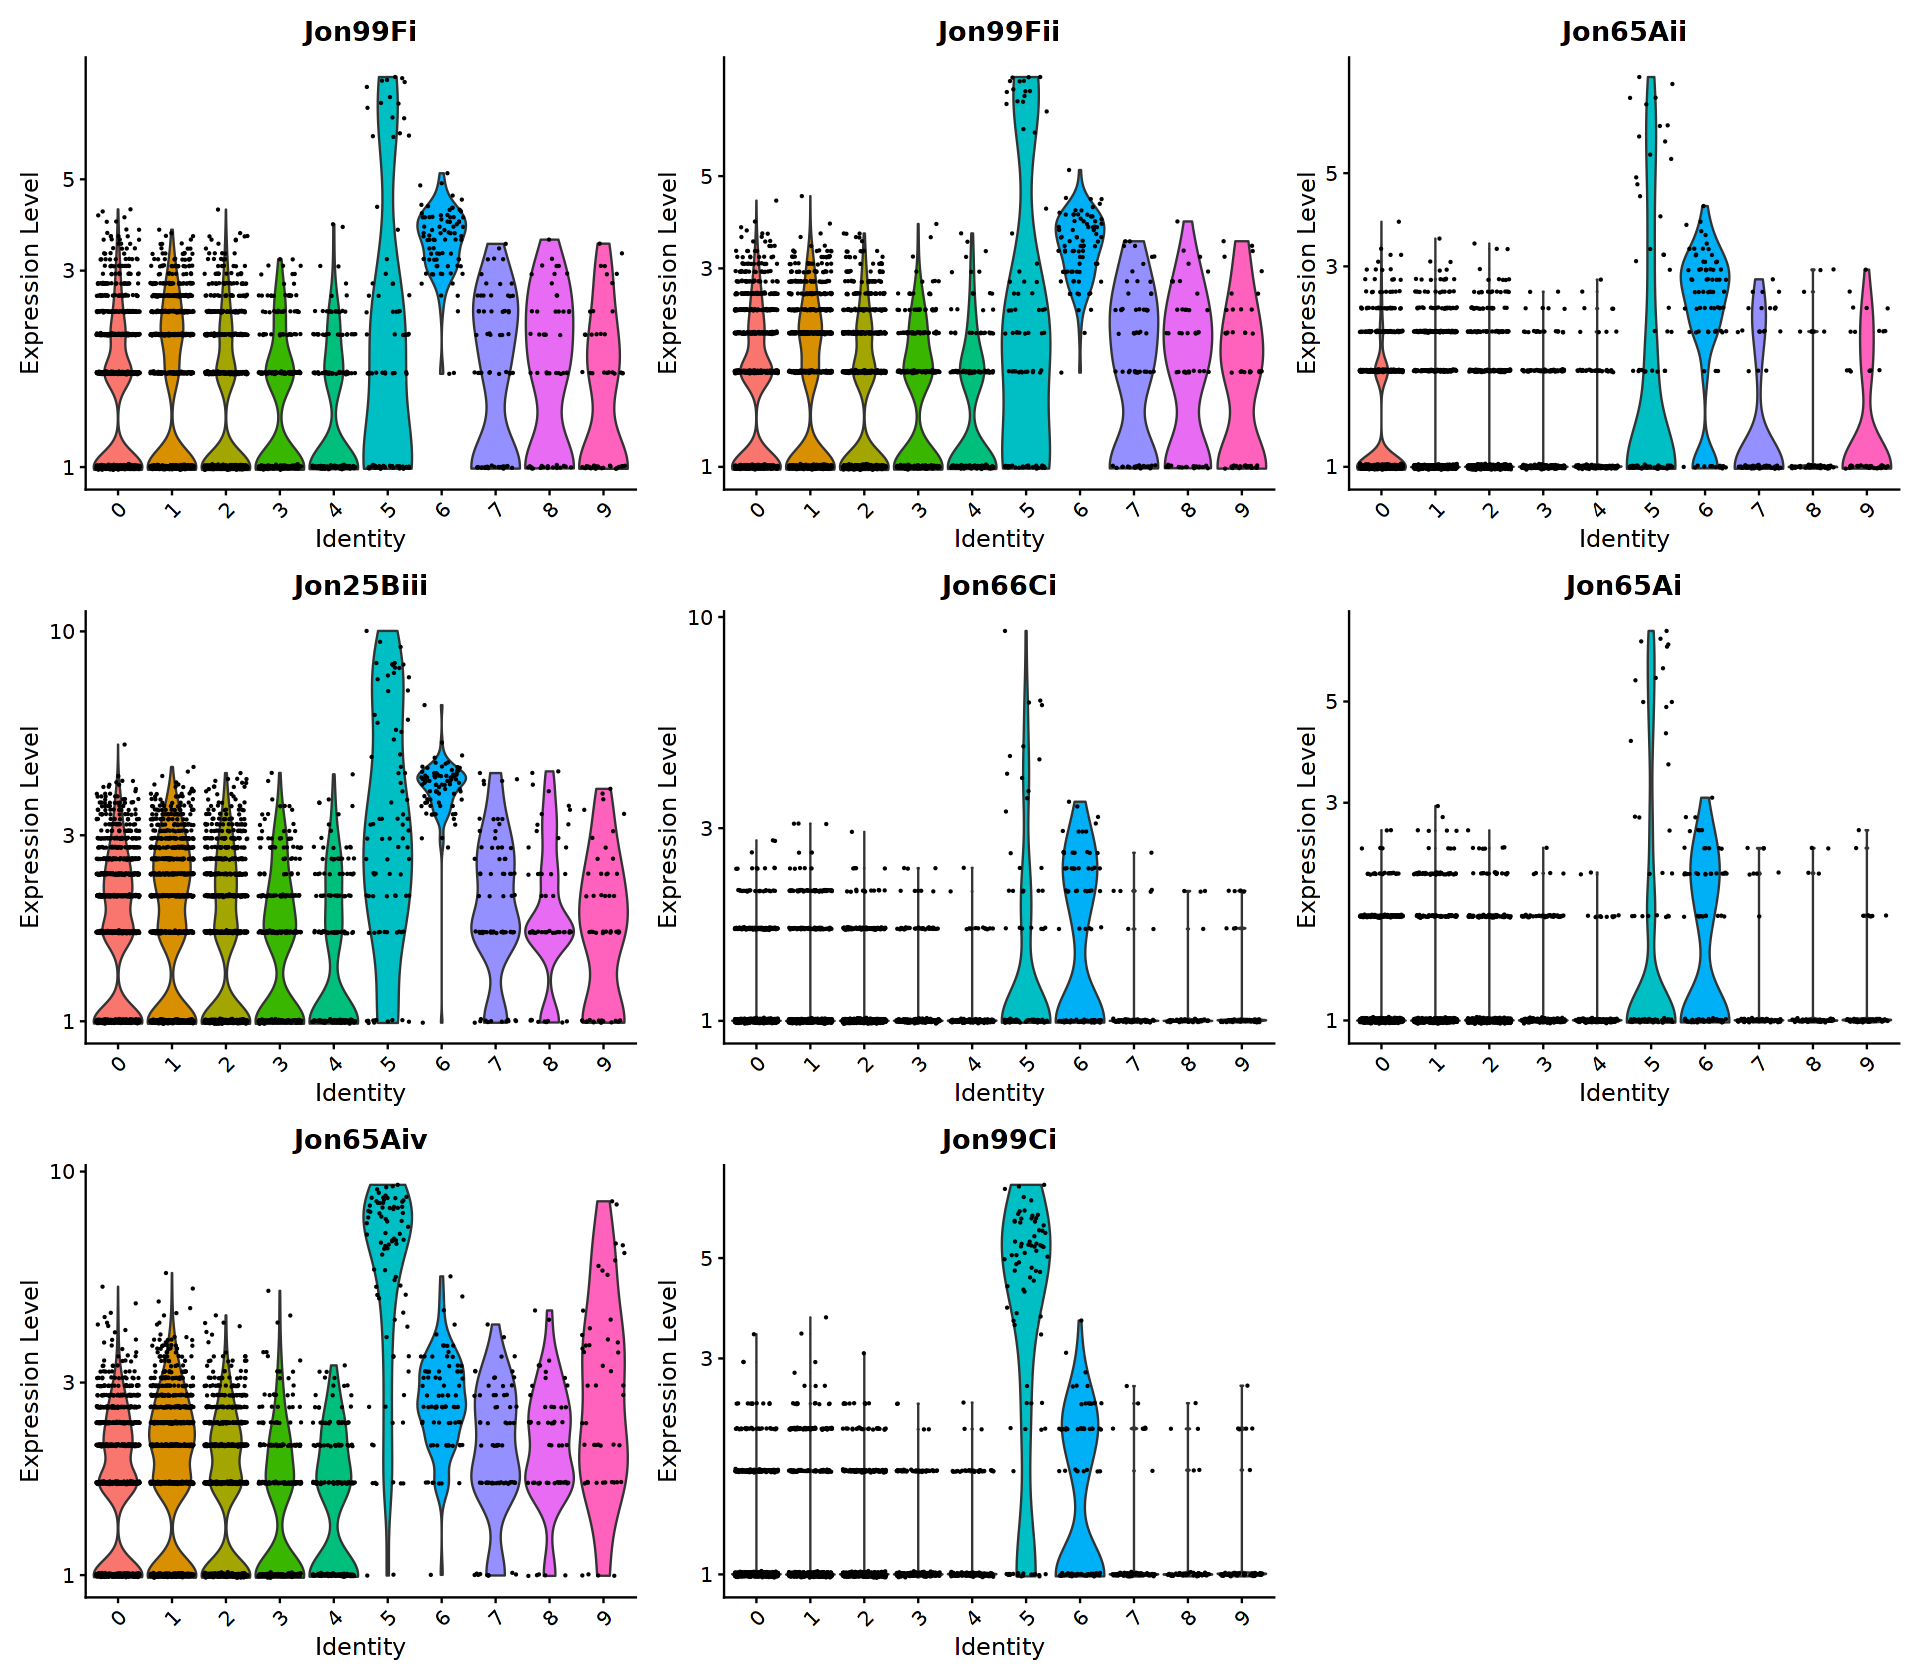

In [38]:
VlnPlot(so, features= markergenes_endopeptidase, slot = "data", log = TRUE)
ggsave("results/seurat_QC_plots/violin_marker_genes_apEC_v2.pdf", width = 16, height = 14)

# Automatic annotation using Hung's datasets and our previous labeled dataset

In [39]:
# Use published data. Previously prepared (datasets/Hung_etal_2020/jupyter notebooks)
reference1 <- readRDS("datasets/Hung_etal_2020/results/hung2020.rds")

# Previously identified dataset
reference2 <- readRDS("datasets/seurat/Seurat_aggr_QC1.rds")
reference2 <- RenameAssays(reference2, spliced="RNA")

reference2[["celltype"]] <- Idents(object = reference2)

In [40]:
# Function to integrate multiple references (it can be more than two)
SCT_integrate_wrapper <- function(objects_to_integrate){
    to_integrate <- map(objects_to_integrate, SCTransform, method = 'glmGamPoi')
    integration_features <- SelectIntegrationFeatures(object.list = to_integrate, nfeatures = 3000)
    to_integrate <- PrepSCTIntegration(object.list = to_integrate, anchor.features = integration_features)
    integration_anchors <- FindIntegrationAnchors(object.list = to_integrate, normalization.method = "SCT", anchor.features = integration_features)
    integrated <- IntegrateData(anchorset = integration_anchors, normalization.method = "SCT")
    integrated <- RunPCA(integrated)
    integrated <- RunUMAP(integrated, dims = 1:30, return.model=TRUE)
    return(integrated)
}

In [41]:
references_list = list(reference1, reference2)
atlas <- SCT_integrate_wrapper(references_list)

#rm(references_list)

Calculating cell attributes from input UMI matrix: log_umi

Variance stabilizing transformation of count matrix of size 10109 by 10605

Model formula is y ~ log_umi

Get Negative Binomial regression parameters per gene

Using 2000 genes, 5000 cells



  |======================================================================| 100%


Found 115 outliers - those will be ignored in fitting/regularization step


Second step: Get residuals using fitted parameters for 10109 genes



  |======================================================================| 100%


Computing corrected count matrix for 10109 genes



  |======================================================================| 100%


Calculating gene attributes

Wall clock passed: Time difference of 1.088945 mins

Determine variable features

Place corrected count matrix in counts slot

Centering data matrix

Set default assay to SCT

Calculating cell attributes from input UMI matrix: log_umi

Variance stabilizing transformation of count matrix of size 9618 by 4218

Model formula is y ~ log_umi

Get Negative Binomial regression parameters per gene

Using 2000 genes, 4218 cells



  |======================================================================| 100%


Found 66 outliers - those will be ignored in fitting/regularization step


Second step: Get residuals using fitted parameters for 9618 genes



  |======================================================================| 100%


Computing corrected count matrix for 9618 genes



  |======================================================================| 100%


Calculating gene attributes

Wall clock passed: Time difference of 43.79899 secs

Determine variable features

Place corrected count matrix in counts slot

Centering data matrix

Set default assay to SCT

Finding all pairwise anchors

Running CCA

Merging objects

Finding neighborhoods

Finding anchors

	Found 10102 anchors

Filtering anchors

	Retained 6790 anchors

Merging dataset 2 into 1

Extracting anchors for merged samples

Finding integration vectors

Finding integration vector weights

Integrating data

PC_ 1 
Positive:  IA-2, MtnA, 7B2, nrv3, Phm, Df31, Pal2, svr, Acbp5, pros 
	   CG31343, cpo, unc-13-4A, mbl, cib, sty, amon, Hsp23, chrb, hdc 
	   fkh, CG30183, CG9568, Acbp3, Tet, CG15423, aqz, Tk, w, Hsp26 
Negative:  betaTry, alphaTry, CG12374, Bace, Jon65Aiv, Jon99Ciii, CG30025, Jon99Cii, Jon65Aiii, Diedel3 
	   epsilonTry, yip7, CG5107, CG6295, Pebp1, Mal-A1, CG7542, deltaTry, Jon25Bii, CG17192 
	   Jon25Bi, tobi, CG8834, Mal-A6, Jon99Ci, Mal-A7, LysD, CG34026, Cyp28d1, C

In [42]:
#atlas[["celltype"]] <- Idents(object = atlas)
#atlas

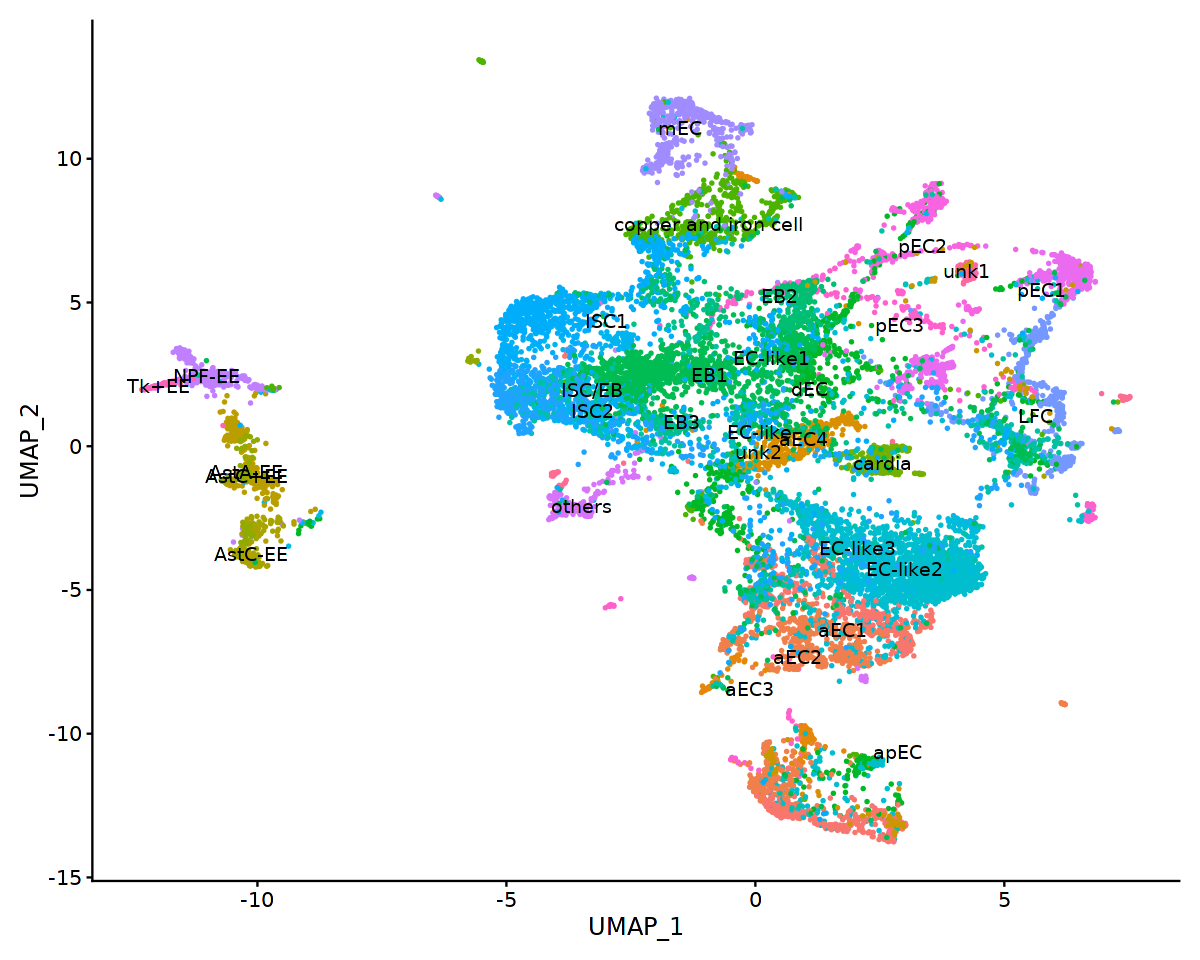

In [43]:
# Atlas created using the references merged
# Inspect if the similar cells cluster together or close

options(repr.plot.width = 10, repr.plot.height = 8)
DimPlot(atlas, reduction = "umap", label = TRUE ,pt.size = 0.5) + NoLegend()
ggsave("results/seurat_DEGs/UMAP_hung_integrated_reference.pdf", width = 10, height = 8)

In [44]:
#DefaultAssay(so) <- "SCT"

In [45]:
# function to transfer cell type labels from reference to query

anchor_wrapper <- function(ref_to_use, query_to_use){
  
    # identify the anchors between reference and query
    transfer_anchors <- FindTransferAnchors(
        reference = ref_to_use,
        query = query_to_use,
        normalization.method = "SCT",
        #reference.reduction = "pca",
        recompute.residuals = TRUE,
        dims = 1:20
    )

    # predict the cell types based on the anchors
    predictions <- TransferData(
        anchorset = transfer_anchors, 
        refdata = ref_to_use$celltype,
        weight.reduction = so[['pca']],
        dims = 1:20
    )
    
    # integrate
    query_to_use <- AddMetaData(
        object = query_to_use,
        metadata = predictions
    )
    
    Idents(query_to_use) <- "predicted.id"
    
    return(query_to_use)
}

Normalizing query using reference SCT model

Performing PCA on the provided reference using 2774 features as input.

Projecting cell embeddings

Finding neighborhoods

Finding anchors

	Found 1002 anchors

Finding integration vectors

Finding integration vector weights

Predicting cell labels



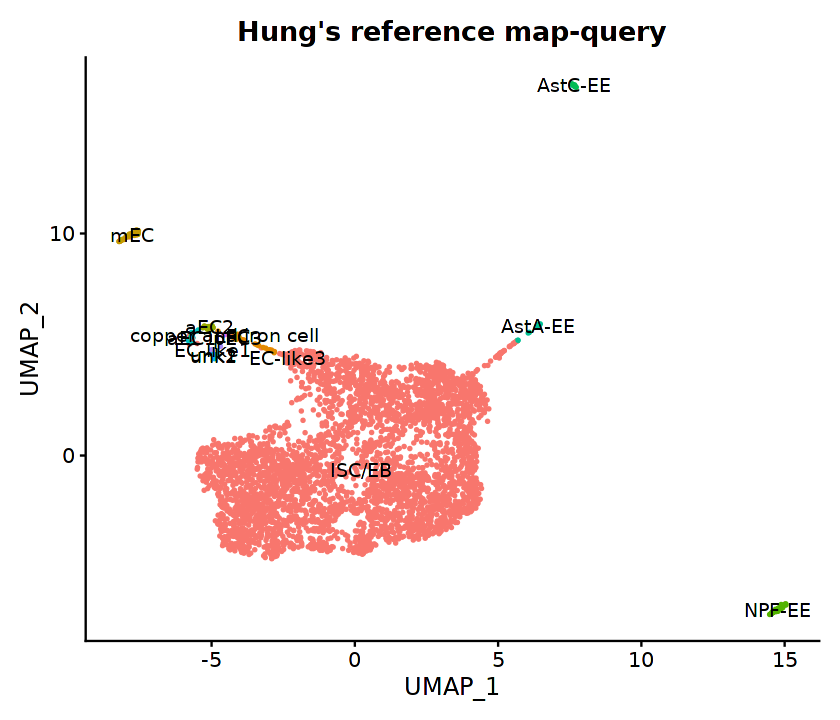

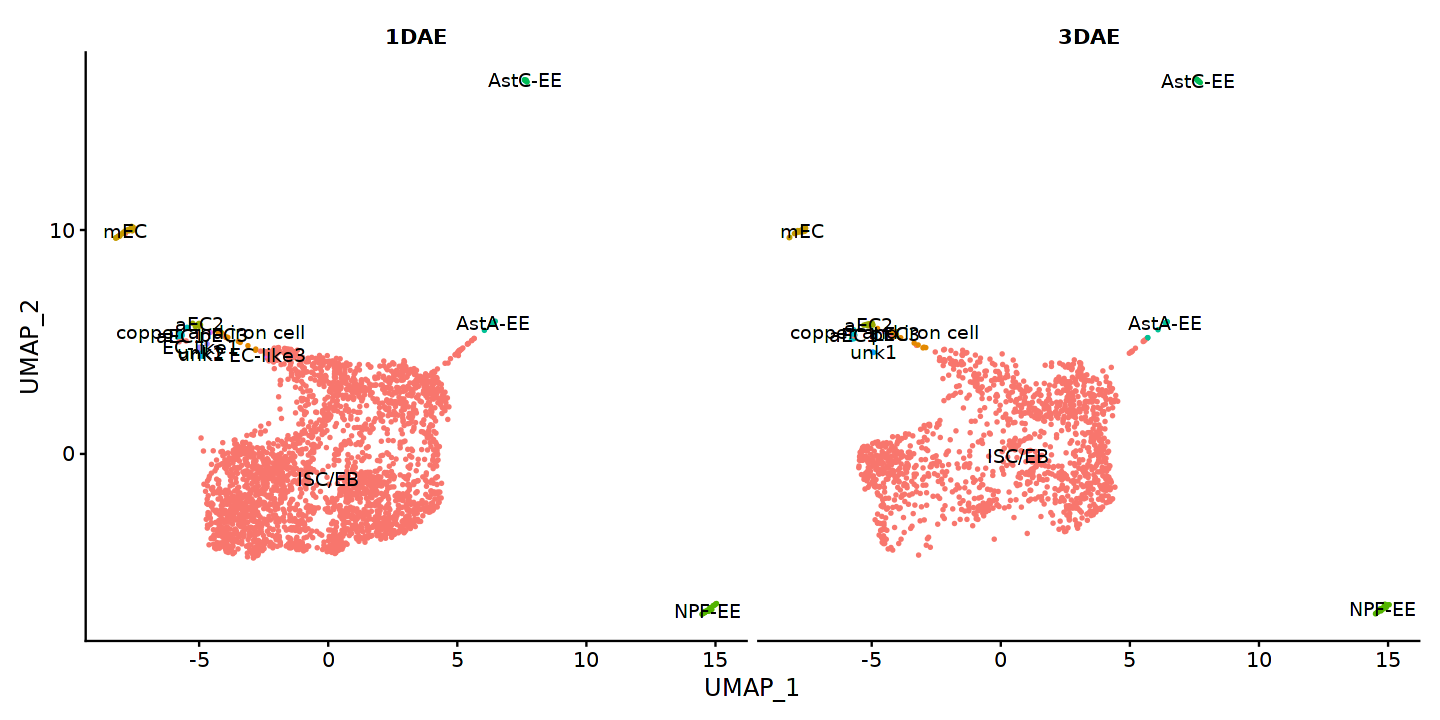

In [46]:
# Using Hung's reference only
so_ref1 <- anchor_wrapper(reference1, so)

options(repr.plot.width = 7, repr.plot.height = 6)
p1 <- DimPlot(object = so_ref1, reduction = "umap", pt.size = .5, label =  TRUE) + 
    ggtitle("Hung's reference map-query") +
    theme(plot.title = element_text(hjust = 0.5)) + 
    NoLegend()
print(p1)
    
options(repr.plot.width = 12, repr.plot.height = 6)
p2 <- DimPlot(object = so_ref1, reduction = "umap", split.by = "sample", pt.size = .5, label =  TRUE) + NoLegend()
print(p2)

Normalizing query using reference SCT model

Performing PCA on the provided reference using 3000 features as input.

Projecting cell embeddings

Finding neighborhoods

Finding anchors

	Found 8557 anchors

Finding integration vectors

Finding integration vector weights

Predicting cell labels



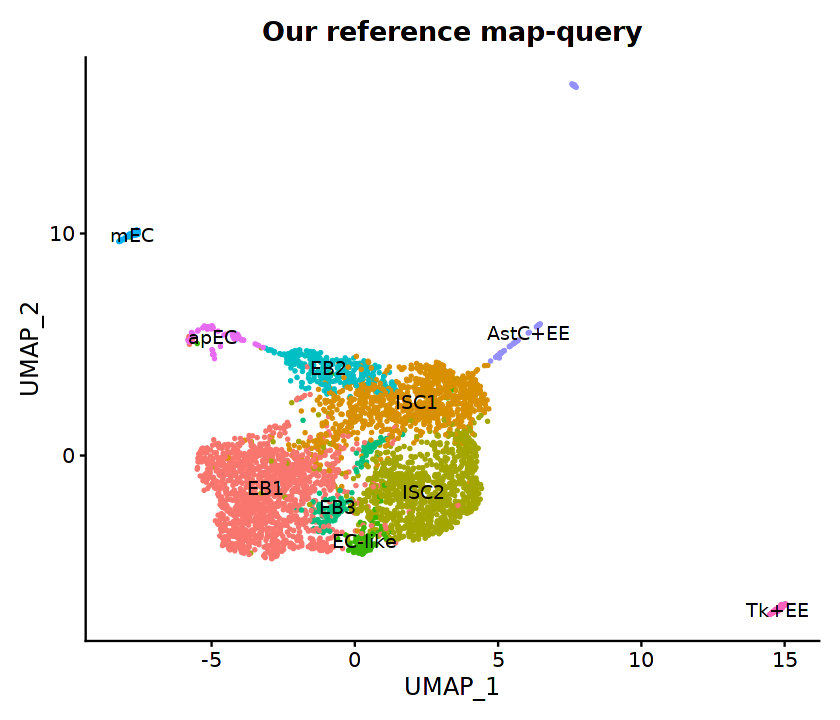

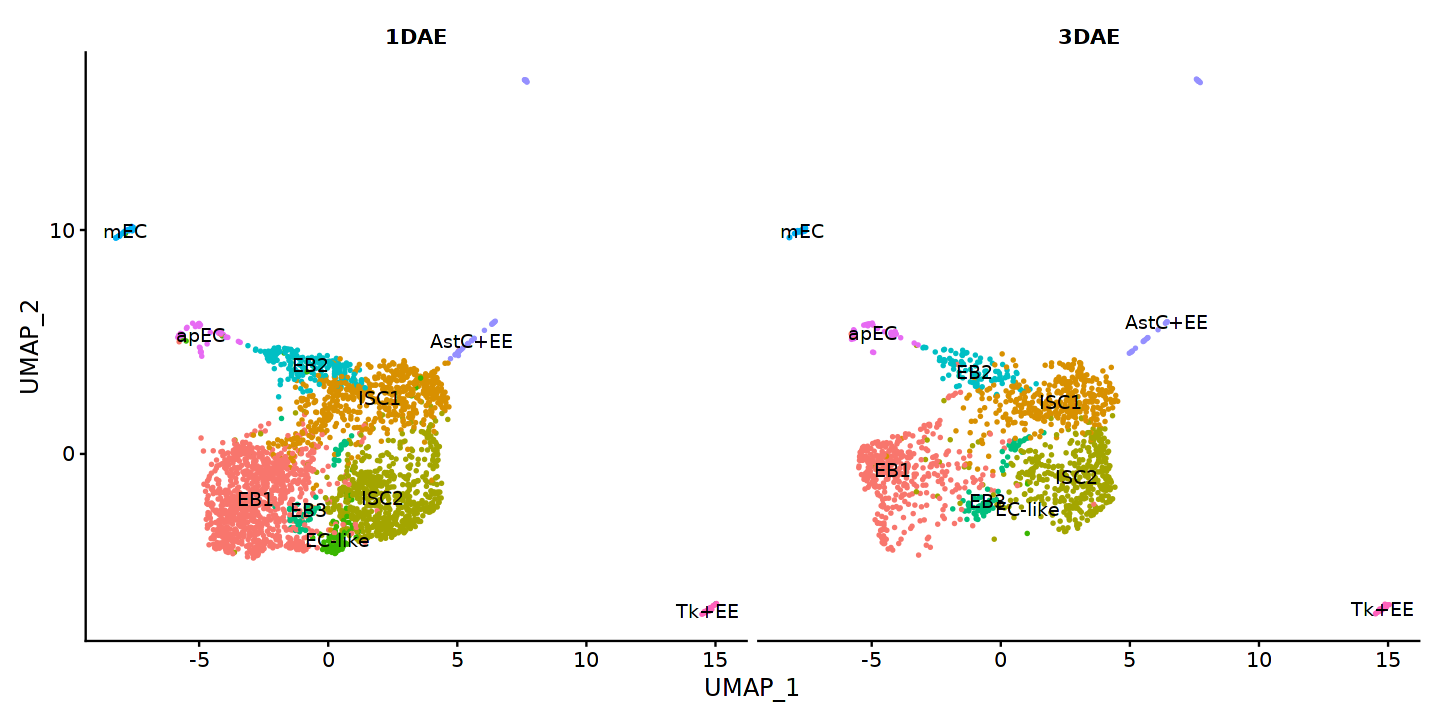

In [47]:
# Using ours reference only
so_ref2 <- anchor_wrapper(reference2, so)

options(repr.plot.width = 7, repr.plot.height = 6)
p1 <- DimPlot(object = so_ref2, reduction = "umap", pt.size = .5, label =  TRUE) + 
    ggtitle("Our reference map-query") +
    theme(plot.title = element_text(hjust = 0.5)) + 
    NoLegend()
print(p1)


options(repr.plot.width = 12, repr.plot.height = 6)
p2 <- DimPlot(object = so_ref2, reduction = "umap", split.by = "sample", pt.size = .5, label =  TRUE) + NoLegend()
print(p2)

Normalizing query using reference SCT model

Performing PCA on the provided reference using 2160 features as input.

Projecting cell embeddings

Finding neighborhoods

Finding anchors

	Found 1450 anchors

Finding integration vectors

Finding integration vector weights

Predicting cell labels



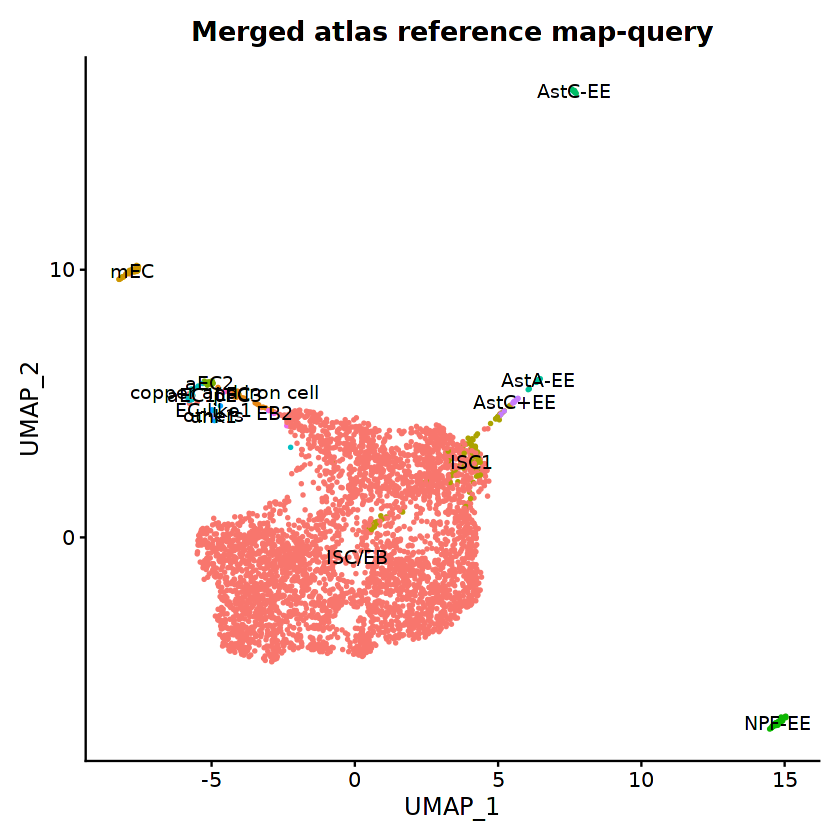

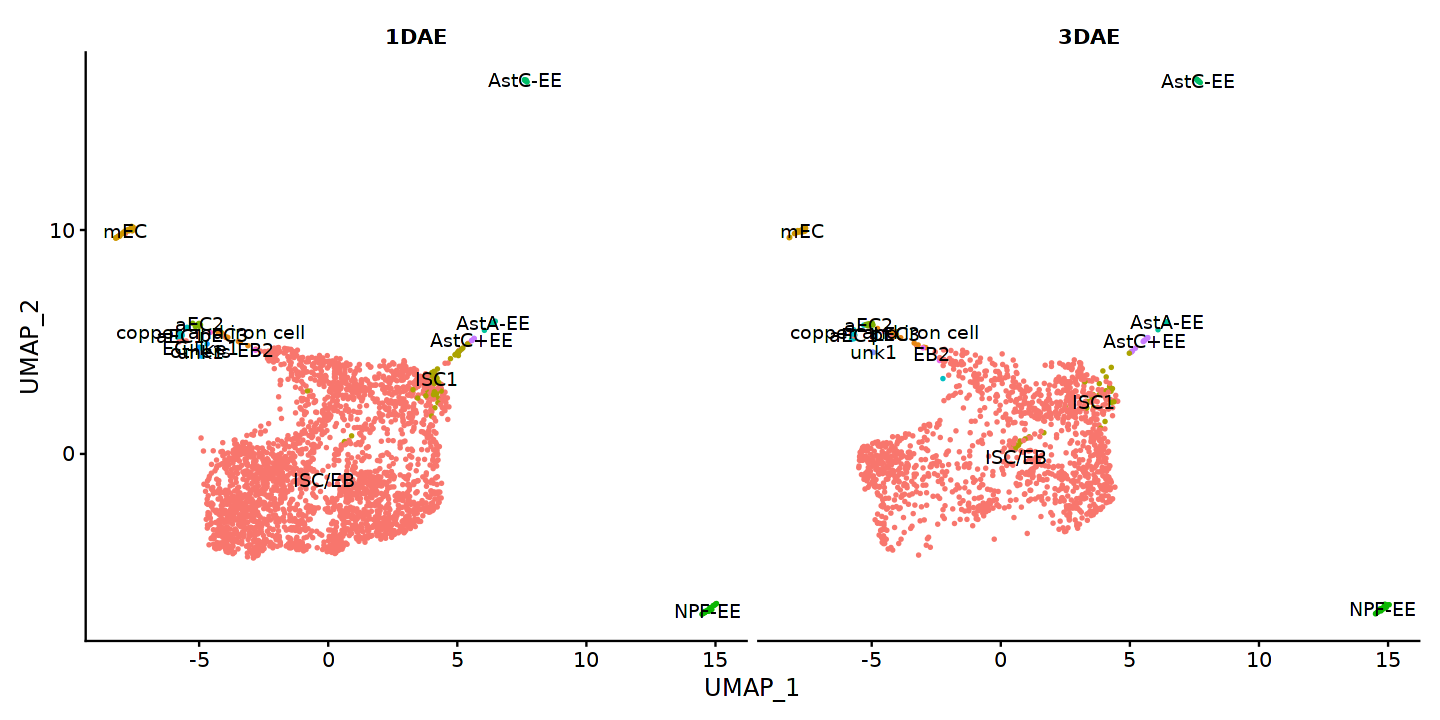

In [48]:
# Using the combined atlas reference
so_ref3 <- anchor_wrapper(atlas, so)

options(repr.plot.width = 7, repr.plot.height = 7)
p1 <- DimPlot(object = so_ref3, reduction = "umap", pt.size = .5, label =  TRUE) + 
    ggtitle("Merged atlas reference map-query") +
    theme(plot.title = element_text(hjust = 0.5)) + 
    NoLegend()
print(p1)
ggsave("results/seurat_DEGs/UMAP_new_labels_v2.pdf", width = 7, height = 6)

options(repr.plot.width = 12, repr.plot.height = 6)
p2 <- DimPlot(object = so_ref3, reduction = "umap", split.by = "sample", pt.size = .5, label =  TRUE) + NoLegend()
print(p2)
ggsave("results/seurat_DEGs/UMAP_new_labels_samples_v2.pdf", width = 12, height = 6)

## Choose which reference is better based on visual inspection

After choosing one, delete the other seurat object to free space.

In [ ]:
# Is there an quantitative approach like correlation between two clusters (our and reference)??



In [105]:
# Delete previous seurat object to receive the new one
rm(so, so_ref1, so_ref3)

so <- so_ref2
#rm()

In [112]:
# Save results after removing the doublets
saveRDS(so, file = "datasets/seurat/Seurat_aggr_QC2.rds")
save(so,file="datasets/seurat/Seurat_aggr_QC2.RData")

In [49]:
# saving to loom file
library(SeuratDisk)
so.loom <- as.loom(so, filename = file.path(getwd(), paste0("datasets/seurat/Seurat_aggr_QC2.loom")), overwrite = TRUE)
so.loom
so.loom$close_all()

Registered S3 method overwritten by 'SeuratDisk':
  method            from  
  as.sparse.H5Group Seurat

Saving data from SCT as /matrix

Adding slot counts for assay SCT

Adding layer counts

Adding col attribute CellID

Adding col attribute orig.ident

Adding col attribute nCount_spliced

Adding col attribute nFeature_spliced

Adding col attribute nCount_unspliced

Adding col attribute nFeature_unspliced

Adding col attribute nCount_ambiguous

Adding col attribute nFeature_ambiguous

Adding col attribute sample

Adding col attribute percent.mt

Adding col attribute percent.rb

Adding col attribute nCount_SCT

Adding col attribute nFeature_SCT

Adding col attribute SCT_snn_res.0.3

Adding col attribute SCT_snn_res.0.5

Adding col attribute SCT_snn_res.0.6

Adding col attribute SCT_snn_res.0.8

Adding col attribute SCT_snn_res.1

Adding col attribute SCT_snn_res.1.6

Adding col attribute seurat_clusters

Adding col attribute clusters

Adding col attribute nCount_RNA

Adding col attribu

Class: loom
Filename: /home/nagai/nakajima_drosophila_project_v2/datasets/seurat/Seurat_aggr_QC2.loom
Access type: H5F_ACC_RDWR
Listing:
       name    obj_type dataset.dims dataset.type_class
      attrs   H5I_GROUP         <NA>               <NA>
  col_attrs   H5I_GROUP         <NA>               <NA>
 col_graphs   H5I_GROUP         <NA>               <NA>
     layers   H5I_GROUP         <NA>               <NA>
     matrix H5I_DATASET  4184 x 9607          H5T_FLOAT
  row_attrs   H5I_GROUP         <NA>               <NA>
 row_graphs   H5I_GROUP         <NA>               <NA>

In [107]:
summary(Idents(object= so))

EB1    ISC1    ISC2 EC-like     EB3     EB2     mEC AstC+EE    apEC   Tk+EE 
   1418     930    1032     108     144     298      50      68      82      54

In [108]:
round(prop.table(table(Idents(so))), digits=3)


    EB1    ISC1    ISC2 EC-like     EB3     EB2     mEC AstC+EE    apEC   Tk+EE 
  0.339   0.222   0.247   0.026   0.034   0.071   0.012   0.016   0.020   0.013 

In [111]:
sessionInfo()

R version 4.0.5 (2021-03-31)
Platform: x86_64-pc-linux-gnu (64-bit)
Running under: Ubuntu 18.04.5 LTS

Matrix products: default
BLAS:   /usr/lib/x86_64-linux-gnu/atlas/libblas.so.3.10.3
LAPACK: /usr/lib/x86_64-linux-gnu/atlas/liblapack.so.3.10.3

locale:
 [1] LC_CTYPE=ja_JP.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=ja_JP.UTF-8        LC_COLLATE=ja_JP.UTF-8    
 [5] LC_MONETARY=ja_JP.UTF-8    LC_MESSAGES=ja_JP.UTF-8   
 [7] LC_PAPER=ja_JP.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=ja_JP.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
 [1] grid      parallel  stats4    stats     graphics  grDevices utils    
 [8] datasets  methods   base     

other attached packages:
 [1] sctransform_0.3.2           KernSmooth_2.23-18         
 [3] fields_11.6                 spam_2.6-0                 
 [5] dotCall64_1.0-1             DoubletFinder_2.0.3        
 [7] magrittr_2.0.1              patchwork_1.1.